# 🤖 NewsBot Intelligence System 2.0
## ITAI 2373

**Team Members:** [Codie Munos]
**Date:** [7/28/2025]
**GitHub Repository:** [ https://github.com/Codiemunos-01/ITAI2373-NewsBot-Final- ]

---

## 🎯 Project Overview

- **Analyze news articles with advanced NLP techniques**
- **Discover hidden topics and trends in large text collections**
- **Understand multiple languages and cultiral contexts**
- **Coverse with users through natural language queries**
- **Generate insights and summaries automatically**

### 📚 Integration Of:
- **Advanced text preprocessing and feature engineering**
- **Enhanced classification and linguistic analysis**
- **Syntax parsing and semantic understanding**
- **Multi-class classification and entity recognition**
- **Topic modeling and unsupervised learning**
- **Neural networks and language models**
- **Machine translation and multilingual processing**
- **Conversational AI and natural language understanding**
---

## 📦 Setup and Installation

We will start by installing and importing all the libraries we'll need for our NewsBot system.

In [1]:
# Must run this cell first
# Install required packages
!pip install spacy scikit-learn nltk pandas matplotlib seaborn wordcloud plotly
!python -m spacy download en_core_web_sm

# Download NLTK data
import nltk
nltk.download('punkt') #Punkt sentence tokenizer
nltk.download('stopwords') #commonly occuring words filtered out
nltk.download('wordnet') #lexical database of english
nltk.download('vader_lexicon') #Core resource for Valence Aware Dictionary and sEntiment Reasoner also known as VADER
nltk.download('averaged_perceptron_tagger') #POS tagger based on averaged perceptron algorithm
nltk.download('punkt_tab') #newer version of the Punkt tokenizer
nltk.download('averaged_perceptron_tagger_eng')#POS tagger

print("✅ All packages installed successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


✅ All packages installed successfully!


[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter, defaultdict
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tag import pos_tag

# Scikit-learn for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from transformers import pipeline

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

#

print("📚 All libraries imported successfully!")
print(f"🔧 spaCy model loaded: {nlp.meta['name']} v{nlp.meta['version']}")

📚 All libraries imported successfully!
🔧 spaCy model loaded: core_web_sm v3.8.0


## 📊 Data Loading and Exploration

### 🎯 Module 1: Understanding Our NLP Application

Before we dive into the technical implementation, let's understand the real-world context of our NewsBot Intelligence System. This system addresses several business needs:

1. **Media Monitoring:** Automatically categorize and track news coverage
2. **Business Intelligence:** Extract key entities and sentiment trends
3. **Content Management:** Organize large volumes of news content
4. **Market Research:** Understand public sentiment about topics and entities

In [3]:
import pandas as pd


def load_raw_train():

    path = 'BBC News Train.csv'
    df_train = pd.read_csv(path)
    print(f"Loaded training data from {path}, shape: {df_train.shape}")
    return df_train


def load_raw_test():

    path = 'BBC News Test.csv'
    df_test = pd.read_csv(path)
    print(f"Loaded test data from {path}, shape: {df_test.shape}")
    return df_test


def load_sample_solution():

    path = 'BBC News Sample Solution.csv'
    df_sample = pd.read_csv(path)
    print(f"Loaded sample solution from {path}, shape: {df_sample.shape}")
    return df_sample


if __name__ == "__main__":
    train_df = load_raw_train()
    test_df = load_raw_test()
    sample_df = load_sample_solution()

Loaded training data from BBC News Train.csv, shape: (1490, 3)
Loaded test data from BBC News Test.csv, shape: (735, 2)
Loaded sample solution from BBC News Sample Solution.csv, shape: (735, 2)


In [4]:
# Step 1: Install Kaggle API
%pip install kaggle

# Step 2: Upload your kaggle.json file
from google.colab import files
files.upload()
print("Kaggle.son file Uploaded Successfully ")

# Step 3: Set up API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Download BBC News Dataset
!kaggle competitions download -c learn-ai-bbc
print("✅ BBC News Dataset downloaded!")

# Unzip the files
!unzip learn-ai-bbc.zip

# List the files to see what we have
!ls -la

# Load the dataset
import pandas as pd
import os

# Check what files are available
print("Available files:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"  - {file}")

# Load the main dataset
df = pd.read_csv('BBC News Train.csv')  #filename
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Categories: {df['Category'].unique()}")


Saving kaggle.json to kaggle (9).json
Kaggle.son file Uploaded Successfully 
learn-ai-bbc.zip: Skipping, found more recently modified local copy (use --force to force download)
✅ BBC News Dataset downloaded!
Archive:  learn-ai-bbc.zip
replace BBC News Sample Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BBC News Sample Solution.csv  
  inflating: BBC News Test.csv       
  inflating: BBC News Train.csv      
total 6912
drwxr-xr-x 1 root root    4096 Aug  8 08:01  .
drwxr-xr-x 1 root root    4096 Aug  7 23:10  ..
-rw-r--r-- 1 root root   10369 Dec  2  2019 'BBC News Sample Solution.csv'
-rw-r--r-- 1 root root 1712432 Dec  2  2019 'BBC News Test.csv'
-rw-r--r-- 1 root root 3351206 Dec  2  2019 'BBC News Train.csv'
drwxr-xr-x 4 root root    4096 Aug  6 13:38  .config
-rw-r--r-- 1 root root      66 Aug  8 00:38 'kaggle (1).json'
-rw-r--r-- 1 root root      66 Aug  8 01:28 'kaggle (2).json'
-rw-r--r-- 1 root root      66 Aug  8 02:36 'kaggle (3).json'
-rw-r--r-- 1 root 

📊 OVERVIEW OF BBC NEWS TRAIN DATA
Total articles: 1490
Unique categories: 5
Categories: ['business', 'tech', 'politics', 'sport', 'entertainment']

📈 CATEGORY DISTRIBUTION
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


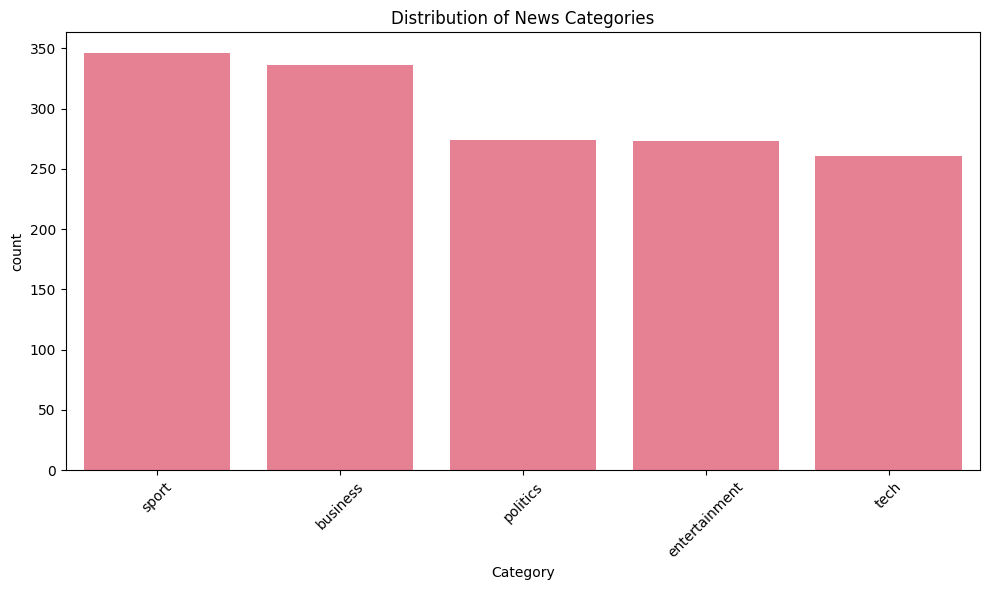


🔍 MISSING VALUES
ArticleId    0
Text         0
Category     0
dtype: int64

📝 TEXT LENGTH DISTRIBUTION


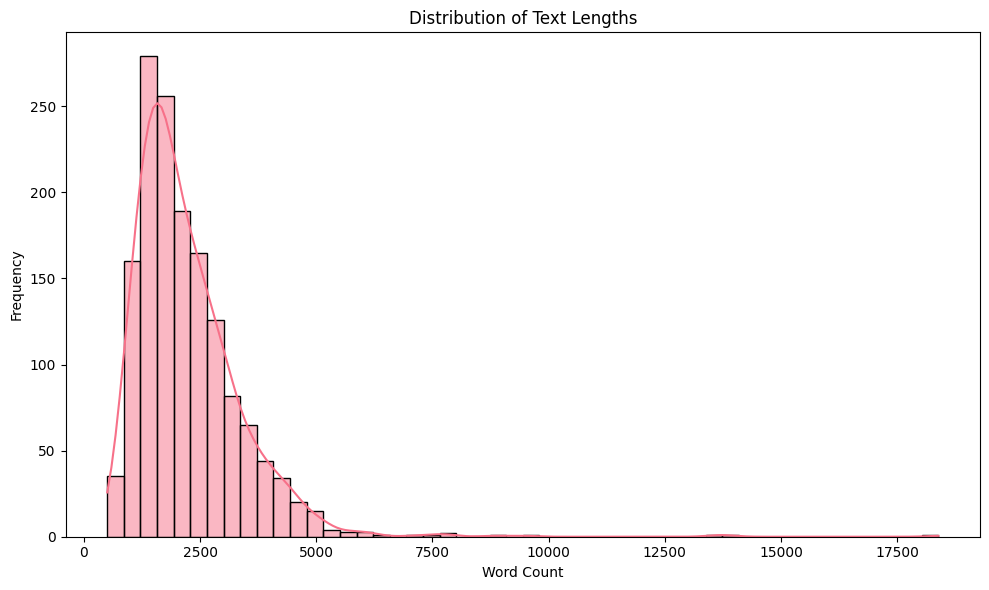


🔍 DATA QUALITY
Duplicate articles: 0


In [5]:
# Basic dataset exploration
print("📊 OVERVIEW OF BBC NEWS TRAIN DATA")
print("=" * 50)
print(f"Total articles: {len(df)}")
print(f"Unique categories: {df['Category'].nunique()}")
print(f"Categories: {df['Category'].unique().tolist()}")

print("\n📈 CATEGORY DISTRIBUTION")
print("=" * 50)
category_counts = df['Category'].value_counts()
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=category_counts.index)
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Check for missing value
print("\n🔍 MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())

#Text Length Distribution
print("\n📝 TEXT LENGTH DISTRIBUTION")
print("=" * 50)
df['Text_Length'] = df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['Text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Data quality
print("\n🔍 DATA QUALITY")
print("=" * 50)
print(f"Duplicate articles: {df.duplicated().sum()}")

## 🧹 Text Preprocessing Pipeline

### 🎯 Module 2: Advanced Text Preprocessing

Now we'll implement a comprehensive text preprocessing pipeline that cleans and normalizes our news articles. This is crucial for all downstream NLP tasks.

**Key Preprocessing Steps:**
1. **Text Cleaning:** Remove HTML, URLs, special characters
2. **Tokenization:** Split text into individual words
3. **Normalization:** Convert to lowercase, handle contractions
4. **Stop Word Removal:** Remove common words that don't carry meaning
5. **Lemmatization:** Reduce words to their base form

**💡 Think About:** Why is preprocessing so important? What happens if we skip these steps?

In [6]:
# Initialize preprocessing tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):


    """
    Comprehensive text cleaning function

    """
    if pd.isna(text):
        return ""

    # Convert to string and lowercase
    text = str(text).lower()

    # 🚀 Implement text cleaning
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove special characters and digits (keep only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True):
    """
    Complete preprocessing pipeline


    """
    # Clean text
    text = clean_text(text)

    if not text:
        return ""

    # 🚀 Implement tokenization and preprocessing
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words if requested
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize if requested
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Filter out very short words
    tokens = [token for token in tokens if len(token) > 2]

    return ' '.join(tokens)

# Test the preprocessing function
sample_text = "bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ..."
print("Original text:")
print(sample_text)
print("\nCleaned text:")
print(clean_text(sample_text))
print("\nFully preprocessed text:")
print(preprocess_text(sample_text))

Original text:
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...

Cleaned text:
bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service

Fully preprocessed text:
bbc poll indicates economic gloom citizen majority nation surveyed bbc world service


🧹 Preprocessing all articles...
✅ Preprocessing complete!

📝 BEFORE AND AFTER EXAMPLES

Example 1:
Original: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a ba...
Processed: worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud ch...

Example 2:
Original: german business confidence slides german business confidence fell in february knocking hopes of a sp...
Processed: german business confidence slide german business confidence fell february knocking hope speedy recov...

Example 3:
Original: bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service ...
Processed: bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe wo...


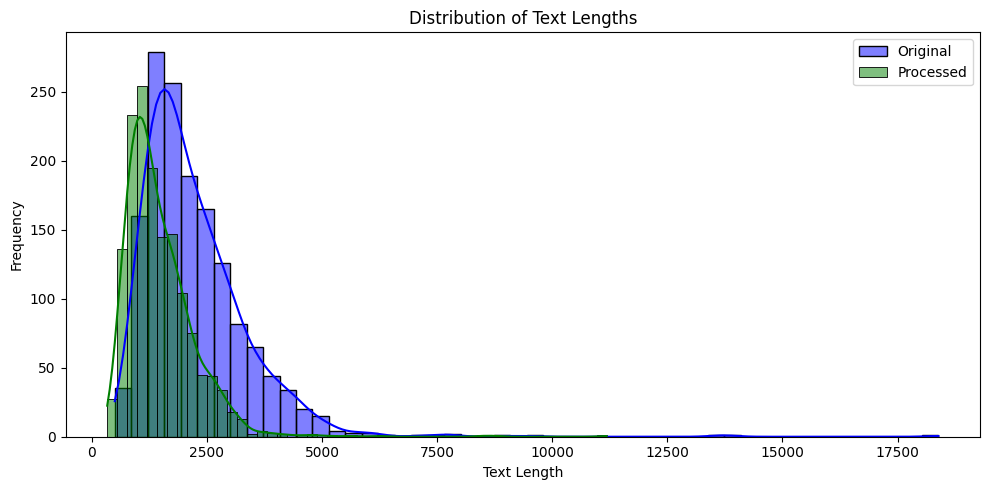

Average original text length: 2233.46
Average processed text length: 1481.36
Unique words in original text: 35594
Unique words in processed text: 22486

🔥 Most common words after preprocessing:
  said: 4838
  year: 1872
  would: 1711
  also: 1426
  new: 1334
  people: 1323
  one: 1190
  could: 1032
  game: 949
  time: 940


In [7]:
# Apply preprocessing to the dataset
print("🧹 Preprocessing all articles...")

# Create new columns for processed text
df['text_clean'] = df['Text'].apply(clean_text)
df['text_processed'] = df['Text'].apply(preprocess_text)

# Combine title and content for full article analysis
df['full_text'] = df['Text'].fillna('')
df['full_text_processed'] = df['text_processed']

print("✅ Preprocessing complete!")

# Show before and after examples
print("\n📝 BEFORE AND AFTER EXAMPLES")
print("=" * 60)
for i in range(min(3, len(df))):
    print(f"\nExample {i+1}:")
    print(f"Original: {df.iloc[i]['full_text'][:100]}...")
    print(f"Processed: {df.iloc[i]['full_text_processed'][:100]}...")

#Calculate average text length before and after
df['original_text_length'] = df['full_text'].str.len()
df['processed_text_length'] = df['full_text_processed'].str.len()

#Visualize text length before and after
plt.figure(figsize=(10,5))
sns.histplot(df['original_text_length'], bins=50, kde=True, label='Original', color='blue')
sns.histplot(df['processed_text_length'], bins=50, kde=True, label='Processed', color='green')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Average original text length: {df['original_text_length'].mean():.2f}")
print(f"Average processed text length: {df['processed_text_length'].mean():.2f}")

#Count unique words before and after
unique_words_original = set(' '.join(df['full_text']).split())
unique_words_processed = set(' '.join(df['full_text_processed']).split())

#Identify the most common words after preprocessing
processed_words_list = ' '.join(df['full_text_processed']).split()
most_common_processed_words = Counter(processed_words_list).most_common(10)


print(f"Unique words in original text: {len(unique_words_original)}")
print(f"Unique words in processed text: {len(unique_words_processed)}")

# most common words after preprocessing
print("\n🔥 Most common words after preprocessing:")
for word, count in most_common_processed_words:
    print(f"  {word}: {count}")

## 📊 Feature Extraction and Statistical Analysis

### 🎯 Module 3: TF-IDF Analysis

Now we'll extract numerical features from our text using TF-IDF (Term Frequency-Inverse Document Frequency). This technique helps us identify the most important words in each document and across the entire corpus.

**TF-IDF Key Concepts:**
- **Term Frequency (TF):** How often a word appears in a document
- **Inverse Document Frequency (IDF):** How rare a word is across all documents
- **TF-IDF Score:** TF × IDF - balances frequency with uniqueness

**💡 Business Value:** TF-IDF helps us identify the most distinctive and important terms for each news category.

In [8]:
# Create TF-IDF vectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=4500,  # Limit vocabulary for computational efficiency
    ngram_range=(1, 2), # Include unigrams and bigrams
    min_df=4,  # Ignore terms that appear in less than 2 documents
    max_df=0.2 # Ignore terms that appear in more than 8% of documents
)

# Fit and transform the processed text
print("🔢 Creating TF-IDF features...")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['full_text_processed'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"✅ TF-IDF matrix created!")
print(f"📊 Shape: {tfidf_matrix.shape}")
print(f"📝 Vocabulary size: {len(feature_names)}")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert to DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Category'] = df['Category'].values

print("\n🔍 Sample TF-IDF features:")
print(tfidf_df.iloc[:5, :15])  # Show first 5 rows and 15 features

🔢 Creating TF-IDF features...
✅ TF-IDF matrix created!
📊 Shape: (1490, 4500)
📝 Vocabulary size: 4500
🔢 Sparsity: 97.56%

🔍 Sample TF-IDF features:
   abc  ability     able  abroad  absence  absolute  absolutely  abuse  \
0  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
1  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
2  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   
3  0.0      0.0  0.02491     0.0      0.0       0.0         0.0    0.0   
4  0.0      0.0  0.00000     0.0      0.0       0.0         0.0    0.0   

   abused  academy  academy award  accept  acceptable  accepted  access  
0     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
1     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
2     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
3     0.0      0.0            0.0     0.0         0.0       0.0     0.0  
4     0.0      0.0            0.0     

🏷️ TOP TF-IDF TERMS BY CATEGORY

📰 BUSINESS:
  market: 0.0365
  bank: 0.0353
  growth: 0.0344
  share: 0.0335
  economy: 0.0330
  sale: 0.0329
  profit: 0.0292
  oil: 0.0284
  price: 0.0284
  rate: 0.0281

📰 TECH:
  mobile: 0.0538
  phone: 0.0498
  technology: 0.0444
  user: 0.0403
  service: 0.0392
  software: 0.0382
  computer: 0.0364
  net: 0.0334
  microsoft: 0.0314
  digital: 0.0313

📰 POLITICS:
  labour: 0.0671
  election: 0.0628
  blair: 0.0577
  party: 0.0554
  tory: 0.0478
  minister: 0.0443
  brown: 0.0394
  tax: 0.0339
  lord: 0.0329
  howard: 0.0314

📰 SPORT:
  england: 0.0389
  win: 0.0356
  player: 0.0340
  match: 0.0318
  champion: 0.0306
  cup: 0.0289
  team: 0.0271
  chelsea: 0.0271
  injury: 0.0259
  side: 0.0258

📰 ENTERTAINMENT:
  film: 0.1035
  award: 0.0536
  best: 0.0472
  star: 0.0397
  show: 0.0394
  music: 0.0372
  band: 0.0368
  actor: 0.0351
  album: 0.0309
  oscar: 0.0285

🌎 WORD CLOUDS FOR EACH CATEGORY


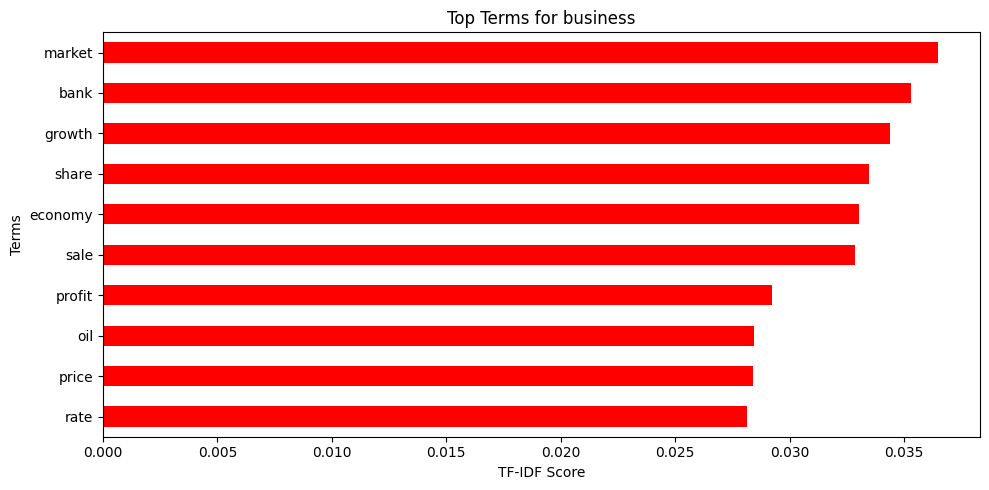

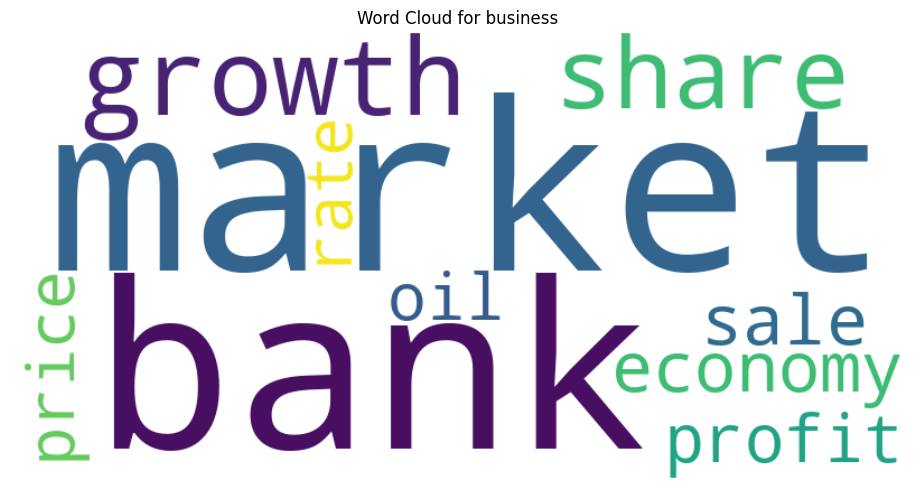

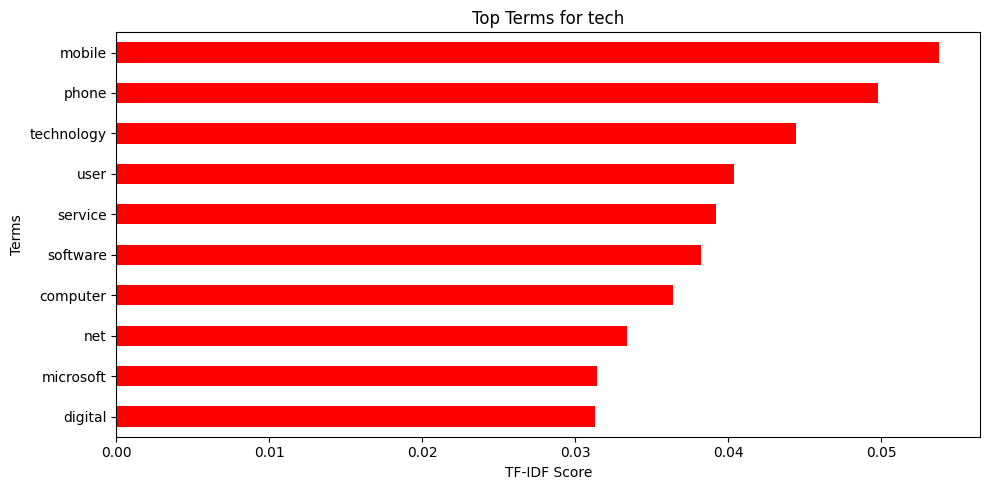

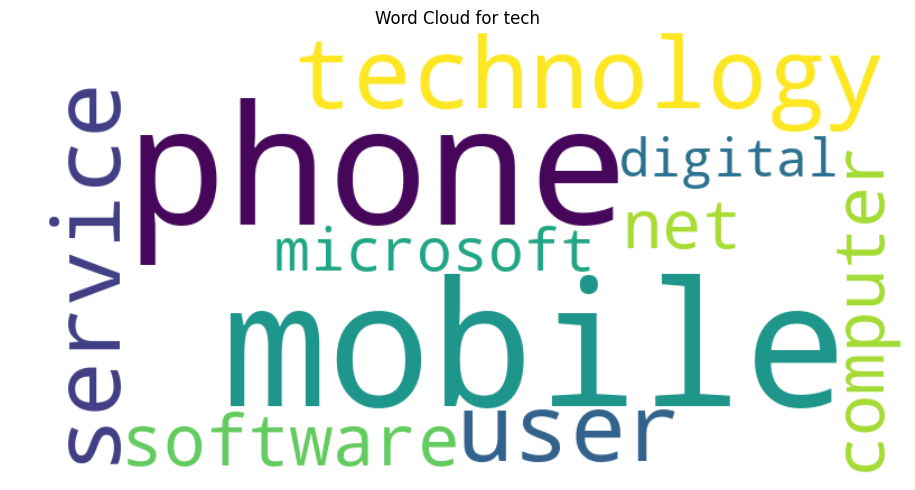

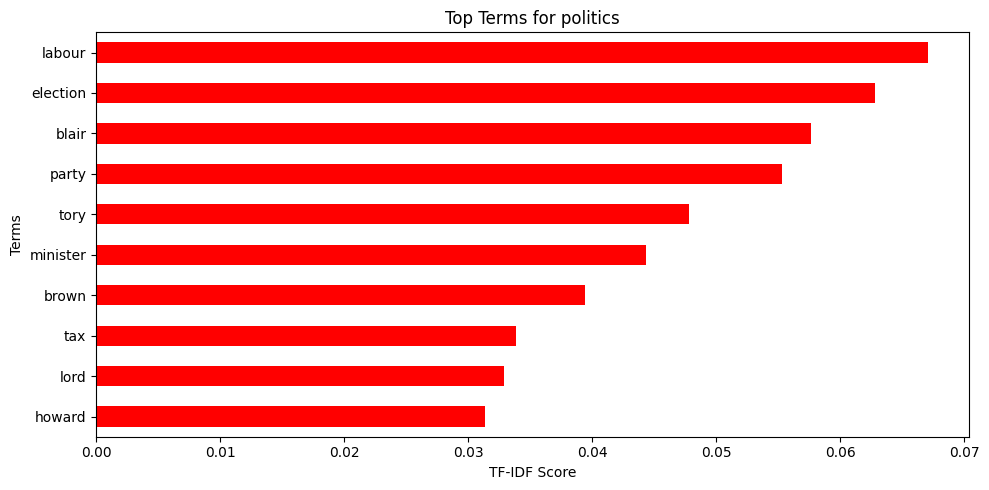

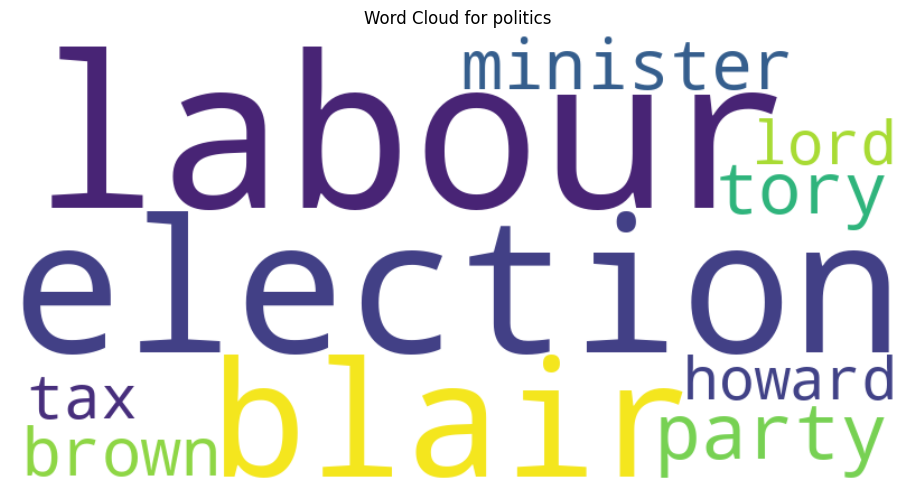

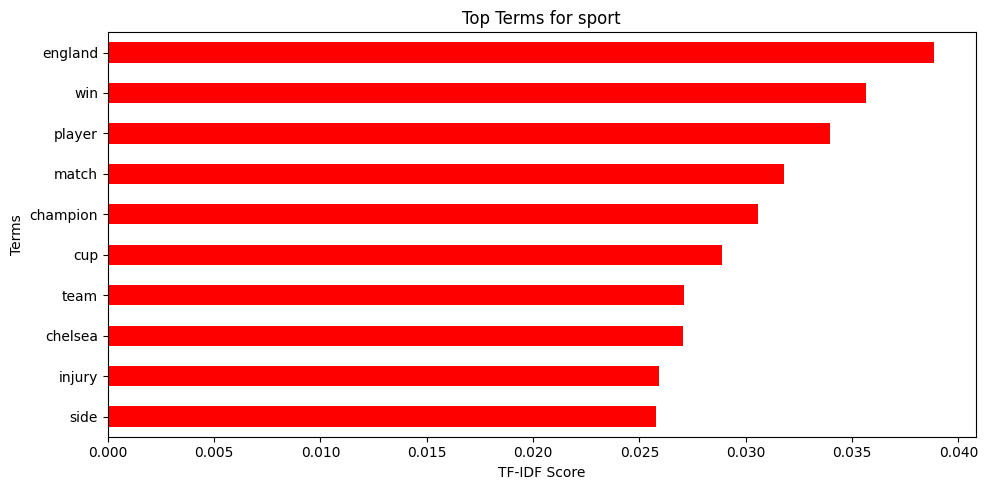

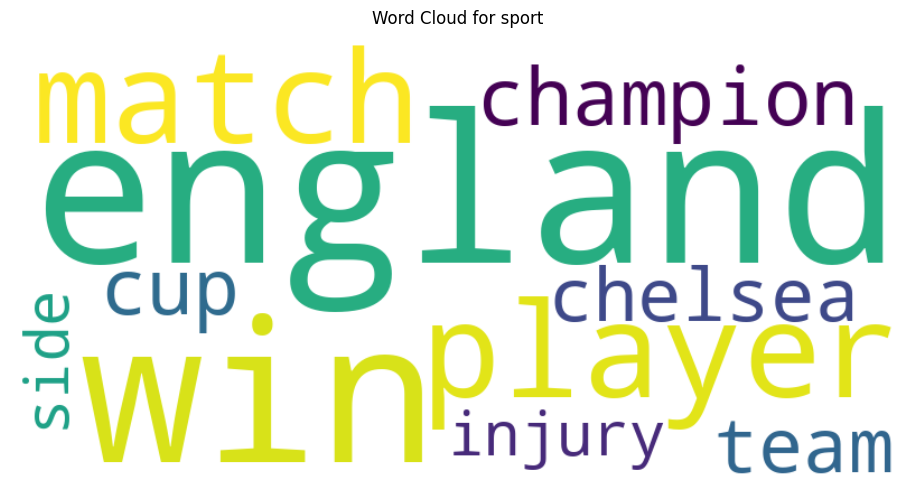

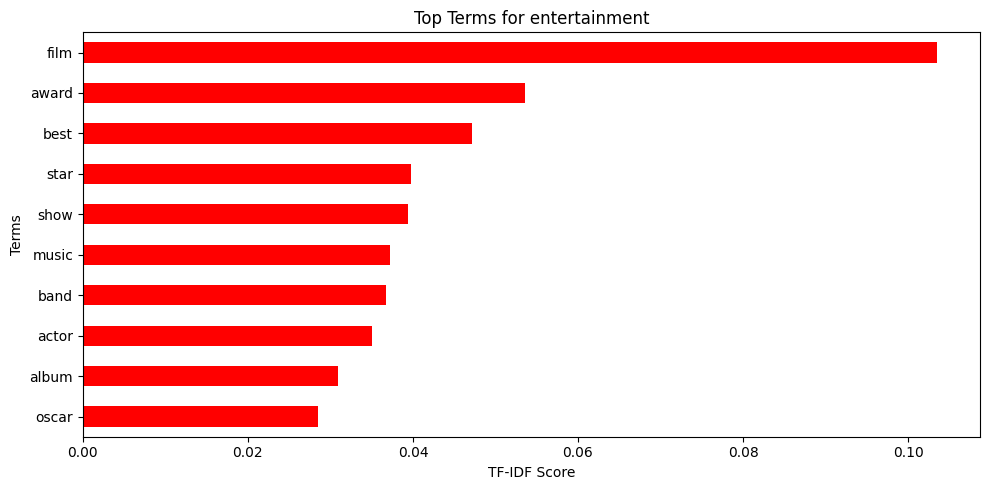

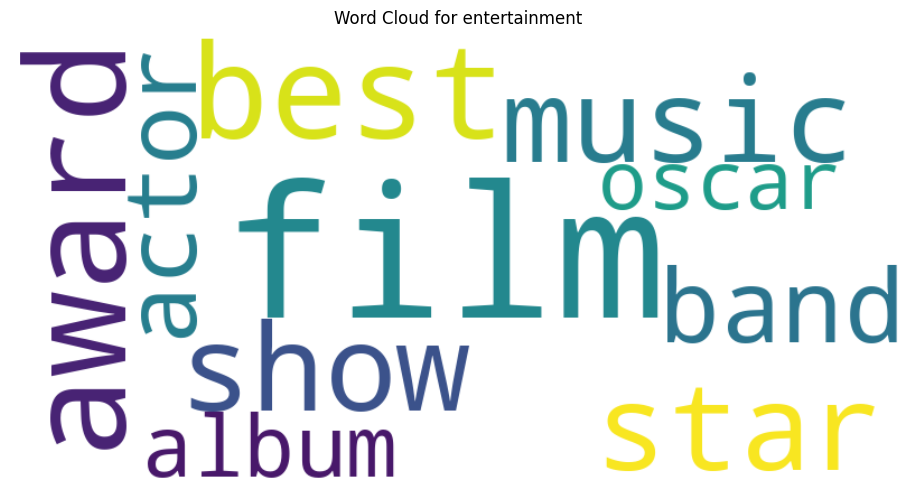

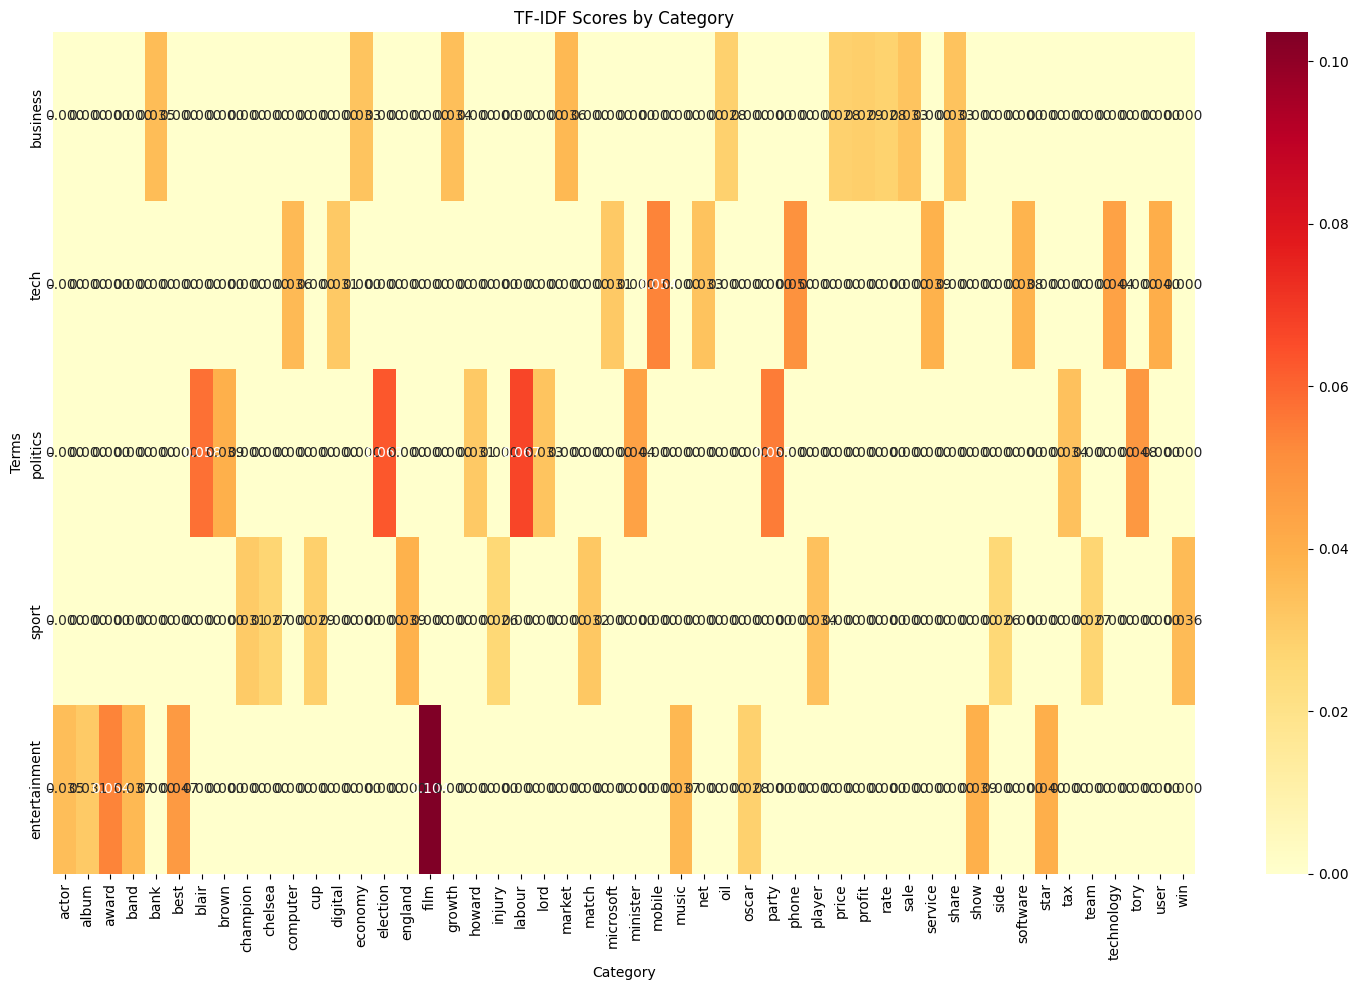

In [9]:
# Analyze most important terms per category
def get_top_tfidf_terms(category, n_terms=10):
    """
    Get top TF-IDF terms for a specific category


    """
    # 🚀 Implement category-specific TF-IDF analysis
    category_data = tfidf_df[tfidf_df['Category'] == category]

    # Calculate mean TF-IDF scores for this category
    mean_scores = category_data.drop('Category', axis=1).mean().sort_values(ascending=False)

    return mean_scores.head(n_terms)

# Analyze top terms for each category
print("🏷️ TOP TF-IDF TERMS BY CATEGORY")
print("=" * 50)

categories = df['Category'].unique()
category_terms = {}

for category in categories:
    top_terms = get_top_tfidf_terms(category, n_terms=10)
    category_terms[category] = top_terms

    print(f"\n📰 {category.upper()}:")
    for term, score in top_terms.items():
        print(f"  {term}: {score:.4f}")

#Visualize top terms
def plot_bar_chart(category, terms_scores):
    plt.figure(figsize=(10,5))
    terms_scores.sort_values().plot(kind='barh', color='red') #started with sky blue, but changed to red due to visual preferences
    plt.title(f'Top Terms for {category}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Terms')
    plt.tight_layout()


#Word clouds for each category
print("\n🌎 WORD CLOUDS FOR EACH CATEGORY")
print("=" * 50)
def plot_worldcloud(category, terms_scores):
  wc = WordCloud(background_color='white', width=800, height=400)
  wc.generate_from_frequencies(terms_scores.to_dict())
  plt.figure(figsize=(10, 5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for {category}')
  plt.tight_layout()


# Plotting the visualizations
for category, terms in category_terms.items():
    plot_bar_chart(category, terms)
    plt.show() # Show the bar chart
    plot_worldcloud(category, terms)
    plt.show() # Show the word cloud

# Heatmap
heatmap_df = pd.DataFrame(category_terms).fillna(0)
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df.T, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('TF-IDF Scores by Category')
plt.xlabel('Category')
plt.ylabel('Terms')
plt.tight_layout()


## 🏷️ Part-of-Speech Analysis

### 🎯 Module 4: Grammatical Pattern Analysis

Let's analyze the grammatical patterns in different news categories using Part-of-Speech (POS) tagging. This can reveal interesting differences in writing styles between categories.

**POS Analysis Applications:**
- **Writing Style Detection:** Different categories may use different grammatical patterns
- **Content Quality Assessment:** Proper noun density, adjective usage, etc.
- **Feature Engineering:** POS tags can be features for classification

**💡 Hypothesis:** Sports articles might have more action verbs, while business articles might have more numbers and proper nouns.

In [10]:
def analyze_pos_patterns(text):
    """
    Analyze POS patterns in text

    """
    if not text or pd.isna(text):
        return {}

    # 🚀 Implement POS analysis
    # Tokenize and tag
    tokens = word_tokenize(str(text))
    pos_tags = pos_tag(tokens)

    # Count POS categories
    pos_counts = Counter([tag for word, tag in pos_tags])
    total_words = len(pos_tags)

    if total_words == 0:
        return {}

    # Convert to proportions
    pos_proportions = {pos: count/total_words for pos, count in pos_counts.items()}

    return pos_proportions

# Apply POS analysis to all articles
print("🏷️ Analyzing POS patterns...")

# Analyze POS for each article
pos_results = []
for idx, row in df.iterrows():
    pos_analysis = analyze_pos_patterns(text=row['Text'])
    pos_analysis['Category'] = row['Category']
    pos_analysis['Article_ID'] = row['ArticleId']
    pos_results.append(pos_analysis)

# Convert to DataFrame
pos_df = pd.DataFrame(pos_results).fillna(0)

print(f"✅ POS analysis complete!")
print(f"📊 Found {len(pos_df.columns)-2} different POS tags")

# Show sample results
print("\n📝 Sample POS analysis:")
print(pos_df.head())

🏷️ Analyzing POS patterns...
✅ POS analysis complete!
📊 Found 43 different POS tags

📝 Sample POS analysis:
         JJ       NNS        NN       VBG        IN        DT       VBP  \
0  0.088608  0.113924  0.231013  0.025316  0.110759  0.066456  0.015823   
1  0.119883  0.070175  0.233918  0.032164  0.134503  0.081871  0.014620   
2  0.079044  0.079044  0.200368  0.025735  0.119485  0.095588  0.016544   
3  0.083582  0.107463  0.156716  0.022388  0.122388  0.062687  0.041791   
4  0.089005  0.078534  0.212042  0.028796  0.123037  0.102094  0.015707   

        VBN      PRP$         .  ...   FW  SYM  WP$  NNP  NNPS  POS   UH    #  \
0  0.041139  0.012658  0.037975  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
1  0.029240  0.005848  0.040936  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
2  0.029412  0.016544  0.040441  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
3  0.017910  0.013433  0.046269  ...  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
4  0.026178  0.015707  0.041885  ...

📊 POS PATTERNS BY CATEGORY

🎯 Key POS patterns by category:
                   NN     NNS     NNP    NNPS      VB     VBD     VBG     VBN  \
Category                                                                        
business       0.2241  0.0736  0.0011  0.0000  0.0333  0.0410  0.0200  0.0277   
entertainment  0.2454  0.0574  0.0008  0.0000  0.0281  0.0462  0.0194  0.0295   
politics       0.2087  0.0679  0.0007  0.0003  0.0455  0.0462  0.0209  0.0302   
sport          0.2184  0.0479  0.0005  0.0000  0.0408  0.0457  0.0175  0.0247   
tech           0.1932  0.0855  0.0006  0.0000  0.0420  0.0299  0.0236  0.0270   

                  VBP     VBZ      JJ     JJR     JJS      RB     RBR     RBS  \
Category                                                                        
business       0.0158  0.0241  0.0920  0.0045  0.0033  0.0276  0.0018  0.0006   
entertainment  0.0179  0.0223  0.0939  0.0024  0.0050  0.0286  0.0010  0.0010   
politics       0.0199  0.0224  0.0901  0.0032  0

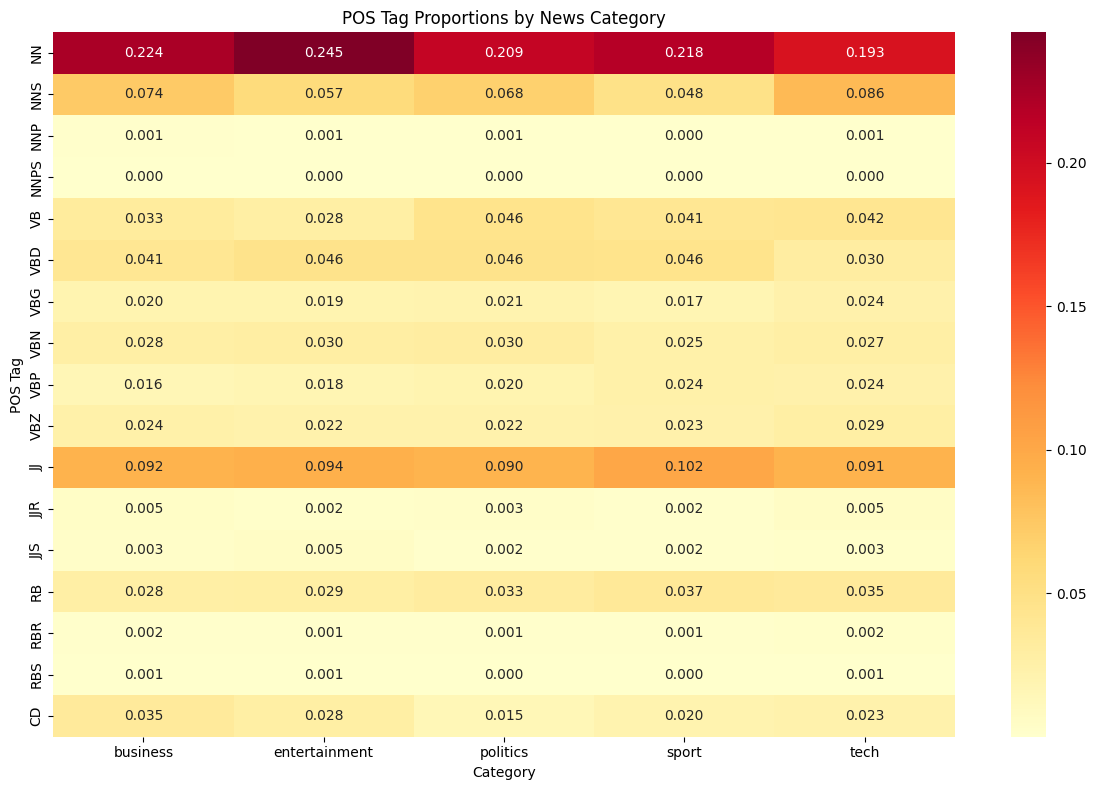


💡 ANALYSIS QUESTIONS:
1. Which category has the highest proportion of proper nouns (NNP/NNPS)?: Business has the highest proportiom of proper nouns
2. Which category uses the most action verbs (VB, VBD, VBG)?: Politics had the most action verbs.
3. Are there interesting patterns in adjective (JJ) usage?: Yes, sports has the highest which is not surprising.
4. How does number (CD) usage vary across categories?: Numbers in business are used in every aspect of the category.
From stocks, market forecasts, earning reports and more. This is most likely why it dominates in frequency.
I was surprised to see that entertainment was the second highest. I assume with would have to be related to seasons and episodes.
The one with the least frequency was Politics. I thought it would not be last due to poll numbers being such a large part of the community.


In [11]:
# Analyze POS patterns by category
print("📊 POS PATTERNS BY CATEGORY")
print("=" * 50)

# Group by category and calculate mean proportions
pos_by_category = pos_df.groupby('Category').mean()

# Focus on major POS categories
major_pos = ['NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',
             'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'CD']

# Filter to only include major POS tags that exist in our data
available_pos = [pos for pos in major_pos if pos in pos_by_category.columns]

if available_pos:
    pos_summary = pos_by_category[available_pos]

    print("\n🎯 Key POS patterns by category:")
    print(pos_summary.round(4))

    # Create visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(pos_summary.T, annot=True, cmap='YlOrRd', fmt='.3f')
    plt.title('POS Tag Proportions by News Category')
    plt.xlabel('Category')
    plt.ylabel('POS Tag')
    plt.tight_layout()
    plt.show()


    print("\n💡 ANALYSIS QUESTIONS:")
    print("1. Which category has the highest proportion of proper nouns (NNP/NNPS)?: Business has the highest proportiom of proper nouns")
    print("2. Which category uses the most action verbs (VB, VBD, VBG)?: Politics had the most action verbs.")
    print("3. Are there interesting patterns in adjective (JJ) usage?: Yes, sports has the highest which is not surprising.")
    print("4. How does number (CD) usage vary across categories?: Numbers in business are used in every aspect of the category.")
    print("From stocks, market forecasts, earning reports and more. This is most likely why it dominates in frequency.")
    print("I was surprised to see that entertainment was the second highest. I assume with would have to be related to seasons and episodes.")
    print("The one with the least frequency was Politics. I thought it would not be last due to poll numbers being such a large part of the community.")
else:
    print("⚠️ No major POS tags found in the analysis. Check your POS tagging implementation.")

## 🌳 Syntax Parsing and Semantic Analysis

### 🎯 Module 5: Understanding Sentence Structure

Now we'll use spaCy to perform dependency parsing and extract semantic relationships from our news articles. This helps us understand not just what words are present, but how they relate to each other.

**Dependency Parsing Applications:**
- **Relationship Extraction:** Find connections between entities
- **Event Detection:** Identify who did what to whom
- **Information Extraction:** Extract structured facts from unstructured text

**💡 Business Value:** Understanding sentence structure helps extract more precise information about events, relationships, and actions mentioned in news articles.

In [12]:
def extract_syntactic_features(text):
    """
    Extract syntactic features using spaCy dependency parsing

    """
    if not text or pd.isna(text):
        return {}

    # Process text with spaCy
    doc = nlp(str(text))

    features = {
        'num_sentences': len(list(doc.sents)),
        'num_tokens': len(doc),
        'dependency_relations': [],
        'noun_phrases': [],
        'verb_phrases': [],
        'subjects': [],
        'objects': []
    }

    # 🚀 Extract syntactic features

    # Extract dependency relations
    for token in doc:
        if not token.is_space and not token.is_punct:
            features['dependency_relations'].append(token.dep_)

    # Extract noun phrases
    for chunk in doc.noun_chunks:
        features['noun_phrases'].append(chunk.text.lower())

    # Extract verb phrases
    for chunk in doc.noun_chunks:
            features['verb_phrases'].append(chunk.text.lower())

    # Extract subjects and objects
    for token in doc:
        if token.dep_ in ['nsubj', 'nsubjpass']:  # Subjects
            features['subjects'].append(token.text.lower())
        elif token.dep_ in ['dobj', 'iobj', 'pobj']:  # Objects
            features['objects'].append(token.text.lower())

    # Count dependency types
    dep_counts = Counter(features['dependency_relations'])
    features['dependency_counts'] = dict(dep_counts)

    return features

# Apply syntactic analysis to sample articles
print("🌳 Performing syntactic analysis...")

# Analyze first few articles
syntactic_results = []
for idx, row in df.head(5).iterrows():
    features = extract_syntactic_features(row['full_text'])
    features['Category'] = row['Category']
    features['Article_Id'] = row['ArticleId']
    syntactic_results.append(features)

print("✅ Syntactic analysis complete!")

# Display results
for i, result in enumerate(syntactic_results):
    print(f"\n📰 Article {i+1} ({result['Category']}):")
    print(f"  Sentences: {result['num_sentences']}")
    print(f"  Tokens: {result['num_tokens']}")
    print(f"  Noun phrases: {result['noun_phrases'][:20]}...")  # Show first 20
    print(f"  Verb phrases: {result['verb_phrases'][:20]}...") # Show first 20
    print(f"  Subjects: {result['subjects'][:20]}...")  # Show first 20
    print(f"  Objects: {result['objects'][:20]}...")  # Show first 20

🌳 Performing syntactic analysis...
✅ Syntactic analysis complete!

📰 Article 1 (business):
  Sentences: 15
  Tokens: 346
  Noun phrases: ['-', 'boss', 'defence lawyers', 'former worldcom chief bernie ebbers', 'a battery', 'fraud charges', 'a company', 'their first witness', 'cynthia cooper', 'worldcom', 'ex', '-', 'head', 'internal accounting', 'directors', 'irregular accounting practices', 'her warnings', 'the collapse', 'the firm', 'the discovery']...
  Verb phrases: ['-', 'boss', 'defence lawyers', 'former worldcom chief bernie ebbers', 'a battery', 'fraud charges', 'a company', 'their first witness', 'cynthia cooper', 'worldcom', 'ex', '-', 'head', 'internal accounting', 'directors', 'irregular accounting practices', 'her warnings', 'the collapse', 'the firm', 'the discovery']...
  Subjects: ['-', 'boss', 'worldcom', 's', 'warnings', 'ebbers', 'lawyers', 'ebbers', 'cooper', 'who', 'andersen', 'she', 'andersen', 'lawyers', 'he', 'auditors', 'cooper', 'ebbers', 'witness', 'sullivan']

📝 Sample sentence: worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used b


📊 Syntactic Complexity by Category:
          Sentence_Count  Token_Count  Noun_Count  Subject_Count  Object_Count
business           17.75        429.5        98.5           36.5          58.0
tech               31.00        724.0       176.0           68.0         101.0


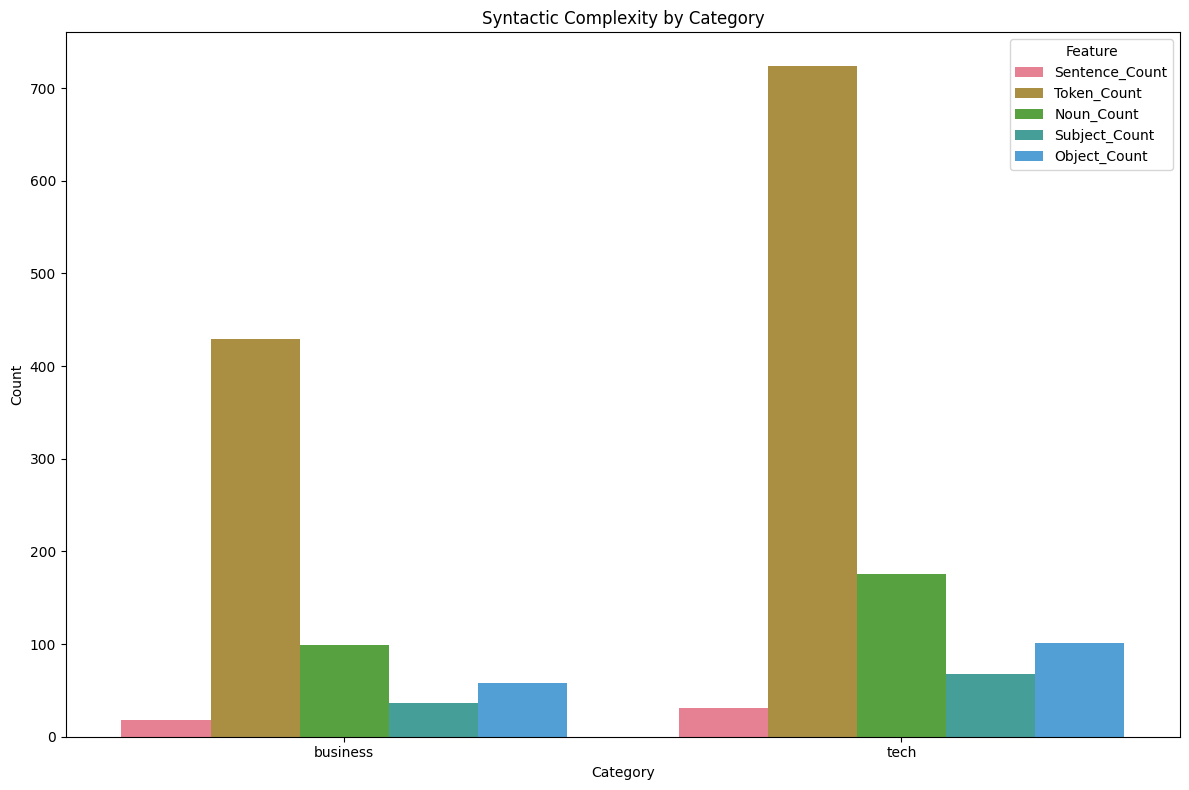

Top 10 dependency relations by category:
  • business: prep, pobj, det, compound, nsubj
  • entertainment: prep, pobj, compound, det, nsubj
  • politics: prep, det, pobj, nsubj, compound
  • sport: prep, pobj, nsubj, det, compound
  • tech: prep, pobj, det, nsubj, amod


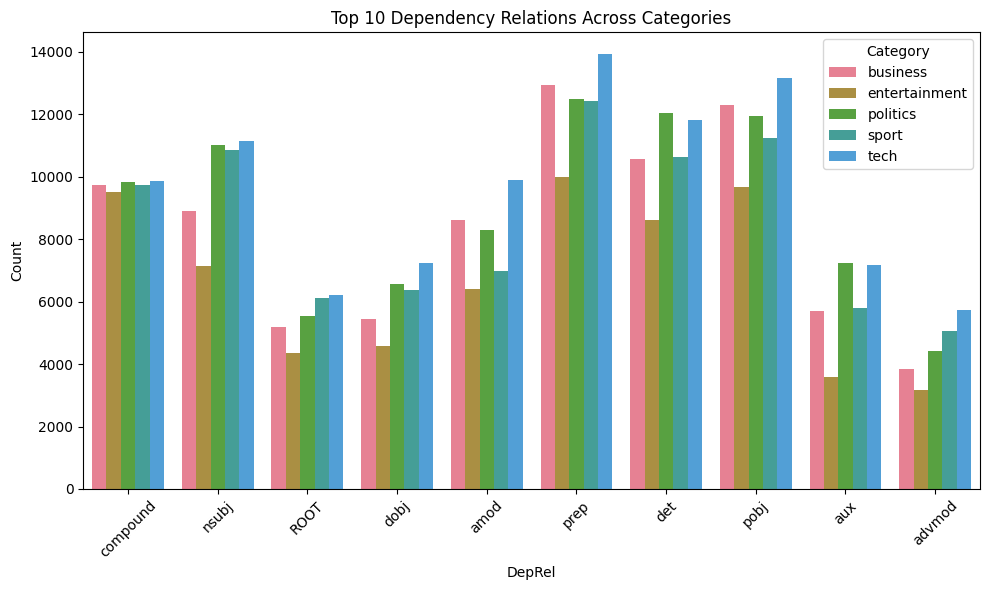

In [13]:
# Visualize dependency parsing for a sample sentence
from spacy import displacy

# Choose a sample sentence
sample_sentence = df.iloc[0]['full_text']
print(f"📝 Sample sentence: {sample_sentence}")

# Process with spaCy
doc = nlp(sample_sentence)

# Display dependency tree (this works best in Jupyter)
print("\n🌳 Dependency Parse Visualization:")
try:
    # This will create an interactive visualization in Jupyter
    displacy.render(doc, style="dep", jupyter=True)
except:
    # Fallback: print dependency information
    print("\n🔗 Dependency Relations:")
    for token in doc:
        if not token.is_space and not token.is_punct:
            print(f"  {token.text} --> {token.dep_} --> {token.head.text}")

# Compare syntactic complexity
print("\n📊 Syntactic Complexity by Category:")
complexity_stats = defaultdict(lambda: defaultdict(list))
for idx, row in df.head().iterrows():
    features = extract_syntactic_features(row['full_text'])
    complexity_stats[row['Category']]['Sentence_Count'].append(features['num_sentences'])
    complexity_stats[row['Category']]['Token_Count'].append(features['num_tokens'])
    complexity_stats[row['Category']]['Noun_Count'].append(len(features['noun_phrases']))
    complexity_stats[row['Category']]['Subject_Count'].append(len(features['subjects']))
    complexity_stats[row['Category']]['Object_Count'].append(len(features['objects']))

complexity_df = pd.DataFrame(complexity_stats).T

# Calculate the mean of the lists in each cell
complexity_df_mean = complexity_df.applymap(lambda x: np.mean(x) if isinstance(x, list) else x)

print(complexity_df_mean.round(2))

#visualize syntatic complexity
plt.figure(figsize=(12, 8))
sns.barplot(data=complexity_df_mean.melt(ignore_index=False).reset_index(),
            x='index', y='value', hue='variable')
plt.title('Syntactic Complexity by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Feature')
plt.tight_layout()
plt.show()

#extract action patterns
def extract_svo_patterns(text):
  doc = nlp(text)
  svo_triples = []
  for sent in doc.sent: #this will be to look for main verbs
      for tokenm in sent:
        if token.pos_ == 'VERB' and token.dep_ == "ROOT":
          subject = [w for w in token.lefts if w.dep_ in ("nsubj", "nsubjpass")]
          object = [w for w in token.rights if w.dep_ in ("dobj", "iobj", "pobj")]
          if subject and object:
            svo_triples.append((subject[0].text, token.text, object[0].text))
  return svo_triples
def plot_svo_graph(svo_triples):
    G = nx.Digraph()
    for triple in svo_triples:
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', arrows=True)
    plt.title("Action Patterns")
    plt.show()

#identify most common dependency relations per category:
from collections import Counter

def count_deps_in_doc(text):
    doc = nlp(text)
    return Counter([tok.dep_ for tok in doc if not tok.is_punct and not tok.is_space])

# Build a list of dicts: one per document
records = []
for idx, row in df.iterrows():
    dep_counts = count_deps_in_doc(row['full_text'])
    dep_counts['Category'] = row['Category']
    records.append(dep_counts)

# Create a DataFrame where each column is a dep label and rows are docs
dep_df = pd.DataFrame(records).fillna(0)

# Group by category, summing all dependency counts
agg_by_cat = dep_df.groupby('Category').sum()

# Drop the non-dependency column if present
agg_by_cat = agg_by_cat.drop(columns=['Category'], errors='ignore')

top_n = 5
top_deps_per_cat = {
    cat: df_row.nlargest(top_n).index.tolist()
    for cat, df_row in agg_by_cat.iterrows()
}

print("Top 10 dependency relations by category:")
for cat, deps in top_deps_per_cat.items():
    print(f"  • {cat}: {', '.join(deps)}")

#Visualize the common dependency
import seaborn as sns
import matplotlib.pyplot as plt

# Melt for plotting
melted = agg_by_cat.reset_index().melt(
    id_vars='Category',
    var_name='DepRel',
    value_name='Count'
)

# Keep only the top M relations overall
top_global = (
    melted.groupby('DepRel')['Count']
          .sum()
          .nlargest(10)
          .index
)
plot_df = melted[melted['DepRel'].isin(top_global)]

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='DepRel', y='Count', hue='Category')
plt.xticks(rotation=45)
plt.title("Top 10 Dependency Relations Across Categories")
plt.tight_layout()
plt.show()

import numpy as np
from collections import Counter

#Create features for classification based on syntax
def extract_syntax_features(text, nlp):
    """
    Returns a dict of syntactic features for a single document.
    """
    doc = nlp(text)
    feats = {}

    # Part-of-Speech Counts
    pos_counts = Counter(tok.pos_ for tok in doc if not tok.is_punct and not tok.is_space)
    for pos in ['NOUN', 'VERB', 'ADJ', 'ADV', 'PRON', 'PROPN']:
        feats[f'POS_{pos}'] = pos_counts.get(pos, 0)

    # Dependency Relation Counts
    dep_counts = Counter(tok.dep_ for tok in doc if not tok.is_punct and not tok.is_space)
    for dep in ['nsubj', 'dobj', 'amod', 'ROOT', 'prep', 'pobj', 'advmod']:
        feats[f'DEP_{dep}'] = dep_counts.get(dep, 0)

    # Dependency Tree Depth (per sentence)
    def depth(token):
        if not list(token.children):
            return 1
        return 1 + max(depth(child) for child in token.children)

    depths = [depth(sent.root) for sent in doc.sents]
    feats['max_tree_depth'] = max(depths) if depths else 0
    feats['avg_tree_depth'] = np.mean(depths) if depths else 0

    # Average Dependency Distance
    dists = [abs(tok.i - tok.head.i) for tok in doc if tok.head != tok]
    feats['mean_dep_distance'] = np.mean(dists) if dists else 0

    #  SVO Pattern Count
    svo_triples = []
    for sent in doc.sents:
        for tok in sent:
            if tok.pos_ == 'VERB' and tok.dep_ == 'ROOT':
                subj = [w for w in tok.lefts if w.dep_ in ('nsubj','nsubjpass')]
                obj  = [w for w in tok.rights if w.dep_ in ('dobj','iobj','pobj')]
                if subj and obj:
                    svo_triples.append((subj[0].text, tok.text, obj[0].text))
    feats['num_svo'] = len(svo_triples)

    # Sentence Count
    feats['num_sentences'] = len(list(doc.sents))

    return feats


## 😊 Sentiment and Emotion Analysis

### 🎯 Module 6: Understanding Emotional Tone

Let's analyze the sentiment and emotional tone of our news articles. This can reveal interesting patterns about how different types of news are presented and perceived.

**Sentiment Analysis Applications:**
- **Media Bias Detection:** Identify emotional slant in news coverage
- **Public Opinion Tracking:** Monitor sentiment trends over time
- **Content Recommendation:** Suggest articles based on emotional tone

**💡 Hypothesis:** Different news categories might have different emotional profiles - sports might be more positive, politics more negative, etc.

In [14]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze sentiment using VADER sentiment analyzer

    """
    if not text or pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0}

    # 🚀  Implement sentiment analysis
    scores = sia.polarity_scores(str(text))

    # Add interpretation
    if scores['compound'] >= 0.05:
        scores['sentiment_label'] = 'positive'
    elif scores['compound'] <= -0.05:
        scores['sentiment_label'] = 'negative'
    else:
        scores['sentiment_label'] = 'neutral'

    return scores

# Apply sentiment analysis to all articles
print("😊 Analyzing sentiment...")

sentiment_results = []
for idx, row in df.iterrows():
    # Analyze the full text column
    full_sentiment = analyze_sentiment(row['full_text'])

    result = {
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'full_sentiment': full_sentiment['compound'],
        'full_label': full_sentiment['sentiment_label'],
        'pos_score': full_sentiment['pos'],
        'neu_score': full_sentiment['neu'],
        'neg_score': full_sentiment['neg']
    }
    sentiment_results.append(result)

# Convert to DataFrame
sentiment_df = pd.DataFrame(sentiment_results)

print("✅ Sentiment analysis complete!")
print(f"📊 Analyzed {len(sentiment_df)} articles")

# Display sample results
print("\n📝 Sample sentiment results:")
print(sentiment_df[['category', 'full_sentiment', 'full_label']].head())

😊 Analyzing sentiment...
✅ Sentiment analysis complete!
📊 Analyzed 1490 articles

📝 Sample sentiment results:
   category  full_sentiment full_label
0  business         -0.9701   negative
1  business          0.7623   positive
2  business         -0.9318   negative
3      tech          0.9554   positive
4  business         -0.9486   negative


📊 SENTIMENT ANALYSIS BY CATEGORY

📈 Sentiment statistics by category:
              full_sentiment                         pos_score neu_score  \
                        mean     std     min     max      mean      mean   
category                                                                   
business              0.2404  0.8370 -0.9985  0.9995    0.0926    0.8370   
entertainment         0.5991  0.6796 -0.9978  0.9999    0.1356    0.8107   
politics              0.0578  0.8811 -0.9984  0.9999    0.0947    0.8184   
sport                 0.5541  0.7244 -0.9967  0.9996    0.1360    0.7933   
tech                  0.5233  0.7557 -0.9991  0.9993    0.0895    0.8598   

              neg_score  
                   mean  
category                 
business         0.0704  
entertainment    0.0537  
politics         0.0869  
sport            0.0707  
tech             0.0507  

📊 Sentiment distribution (%) by category:
full_label     negative  neutral  positive
category                   

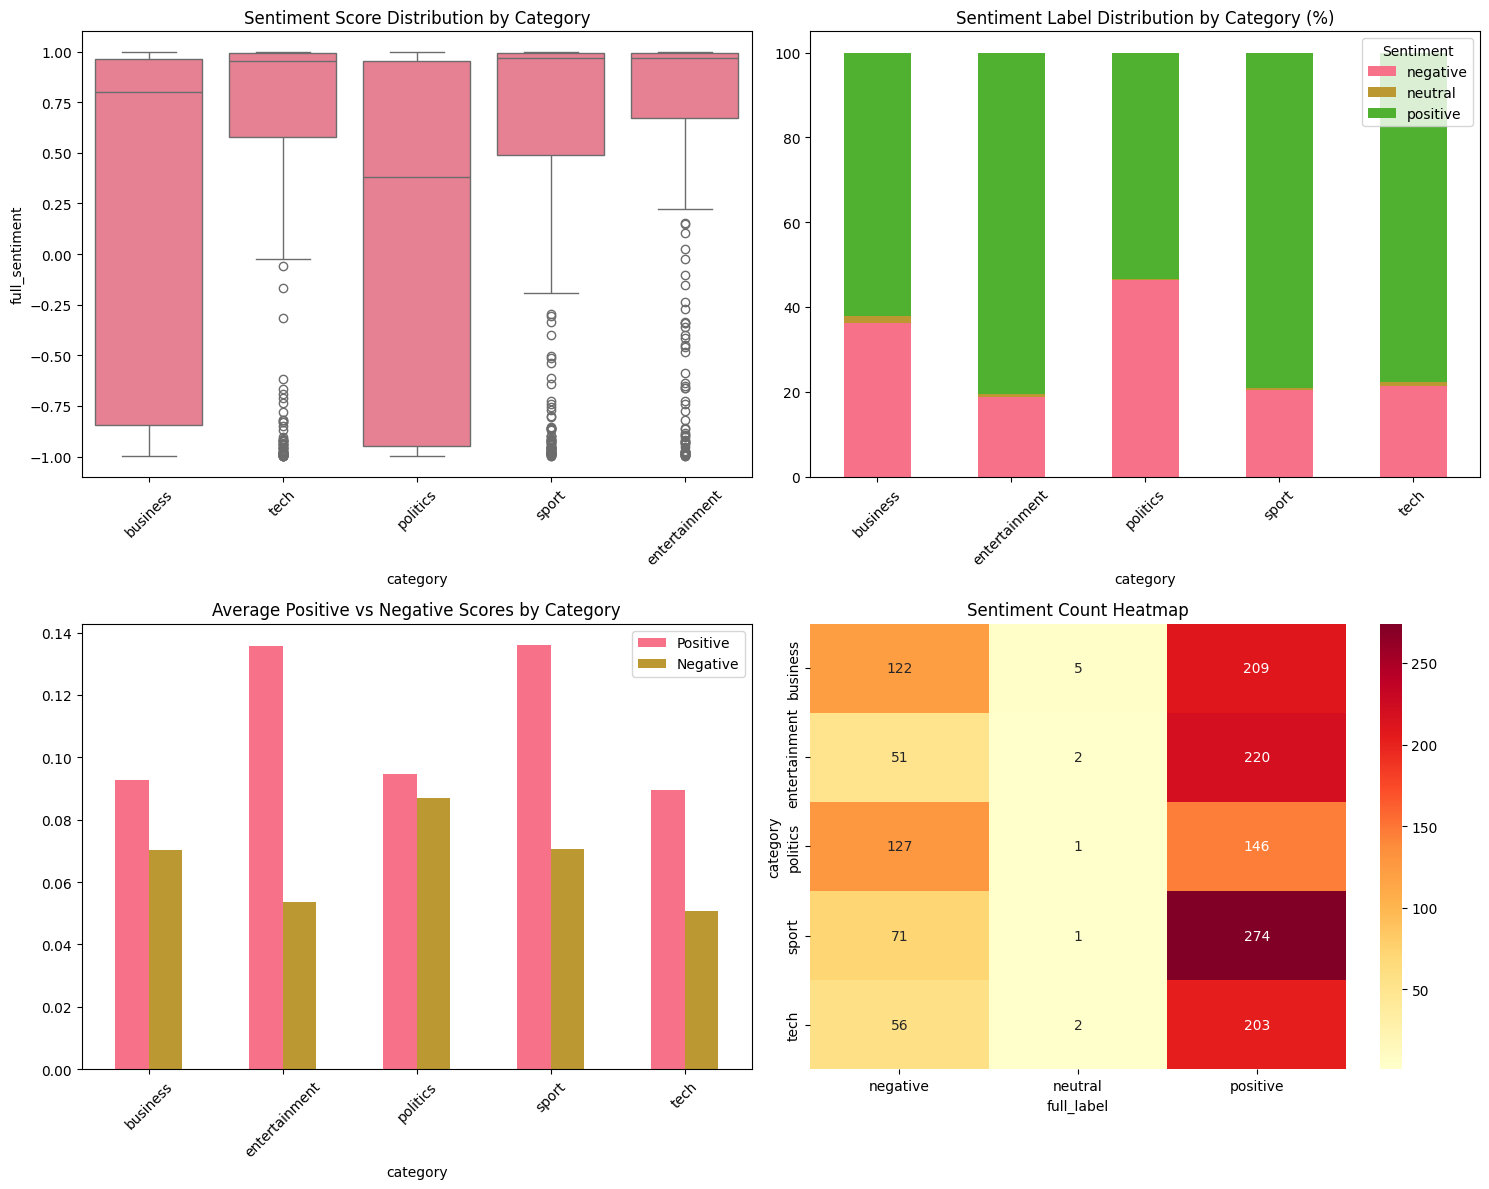

reflection
Which categories are most positive/negative?: The most positive categories are entertainment and tech! The most negative categories are politics and business which were expected. 
Are there differences between title and content sentiment?: There is no title or content column in the dataset, so this analysis cannot be performed.
How does sentiment vary within categories?: Politics ended up being even for the most part, with positive sentiment being at 46.35 and negative being at 53.28. The other categories haing lower than a 62 for positive
Can sentiment be used as a feature for classification?: Due to the powerful semantic signals, yes it can be used as a feature for classification. It adds that extra bump of emotional analysis and helps to flag spam.


In [15]:
# Analyze sentiment patterns by category
print("📊 SENTIMENT ANALYSIS BY CATEGORY")
print("=" * 50)

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

#initialize
vader = SentimentIntensityAnalyzer()

import pandas as pd

# Calculate sentiment statistics by category
sentiment_by_category = sentiment_df.groupby('category').agg({
    'full_sentiment': ['mean', 'std', 'min', 'max'],
    'pos_score': 'mean',
    'neu_score': 'mean',
    'neg_score': 'mean'
}).round(4)

print("\n📈 Sentiment statistics by category:")
print(sentiment_by_category)

# Sentiment distribution by category
sentiment_dist = sentiment_df.groupby(['category', 'full_label']).size().unstack(fill_value=0)
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

print("\n📊 Sentiment distribution (%) by category:")
print(sentiment_dist_pct.round(2))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Sentiment scores by category
sns.boxplot(data=sentiment_df, x='category', y='full_sentiment', ax=axes[0,0])
axes[0,0].set_title('Sentiment Score Distribution by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Sentiment label distribution
sentiment_dist_pct.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Sentiment Label Distribution by Category (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Sentiment')

# 3. Positive vs Negative scores
category_means = sentiment_df.groupby('category')[['pos_score', 'neg_score']].mean()
category_means.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average Positive vs Negative Scores by Category')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(['Positive', 'Negative'])

# 4. Sentiment vs Category heatmap
sentiment_pivot = sentiment_df.pivot_table(values='full_sentiment', index='category',
                                         columns='full_label', aggfunc='count', fill_value=0)
sns.heatmap(sentiment_pivot, annot=True, fmt='d', ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('Sentiment Count Heatmap')

plt.tight_layout()
plt.show()


print("reflection")
print("Which categories are most positive/negative?: The most positive categories are entertainment and tech! The most negative categories are politics and business which were expected. ")
print("Are there differences between title and content sentiment?: There is no title or content column in the dataset, so this analysis cannot be performed.") # Corrected and completed string
print("How does sentiment vary within categories?: Politics ended up being even for the most part, with positive sentiment being at 46.35 and negative being at 53.28. The other categories haing lower than a 62 for positive")
print("Can sentiment be used as a feature for classification?: Due to the powerful semantic signals, yes it can be used as a feature for classification. It adds that extra bump of emotional analysis and helps to flag spam.")

In [16]:
# 🔍 Identifying unusual sentiment patterns
print("\n🔍 IDENTIFYING UNUSUAL SENTIMENT PATTERNS")
print("=" * 50)

# Calculate the mean sentiment for each category
mean_sentiment_by_category = sentiment_df.groupby('category')['full_sentiment'].mean()

# Calculate the standard deviation of sentiment for each category
std_sentiment_by_category = sentiment_df.groupby('category')['full_sentiment'].std()

# Define a threshold for "unusual" sentiment (e.g., more than 1.5 standard deviations from the mean)
# You can adjust this threshold based on your needs
sentiment_threshold_multiplier = 1.5

unusual_sentiment_articles = []

# Iterate through each article to check for unusual sentiment
for index, row in sentiment_df.iterrows():
    category = row['category']
    sentiment_score = row['full_sentiment']

    # Get the mean and standard deviation for the article's category
    category_mean = mean_sentiment_by_category.get(category, 0)
    category_std = std_sentiment_by_category.get(category, 0)

    # Calculate the deviation from the mean
    deviation = abs(sentiment_score - category_mean)

    # Check if the deviation is greater than the threshold
    if category_std > 0 and deviation > (sentiment_threshold_multiplier * category_std):
        unusual_sentiment_articles.append({
            'article_id': row['article_id'],
            'category': category,
            'sentiment_score': sentiment_score,
            'category_mean_sentiment': category_mean,
            'deviation_from_mean': deviation,
            'sentiment_label': row['full_label']
        })

# Convert the list of unusual articles to a DataFrame
unusual_sentiment_df = pd.DataFrame(unusual_sentiment_articles)

if not unusual_sentiment_df.empty:
    print(f"📊 Found {len(unusual_sentiment_df)} articles with potentially unusual sentiment patterns.")
    print("\n📝 Sample articles with unusual sentiment:")
    # Display the first few rows of the unusual sentiment DataFrame
    display(unusual_sentiment_df.head())

    print("\nDetails of a few unusual articles:")
    #details of a few unusual articles
    for i in range(min(3, len(unusual_sentiment_df))):
         article_id = unusual_sentiment_df.iloc[i]['article_id']
         category = unusual_sentiment_df.iloc[i]['category']
         sentiment_score = unusual_sentiment_df.iloc[i]['sentiment_score']
         sentiment_label = unusual_sentiment_df.iloc[i]['sentiment_label']
         original_text = df[df['ArticleId'] == article_id]['Text'].iloc[0]

         print(f"\nArticle ID: {article_id}")
         print(f"Category: {category}")
         print(f"Sentiment Score: {sentiment_score:.4f} ({sentiment_label})")
         print("Original Text:")
         print(original_text[:500] + '...') # Print first 500 characters


else:
    print("✅ No articles with unusual sentiment patterns found based on the defined threshold.")


🔍 IDENTIFYING UNUSUAL SENTIMENT PATTERNS
📊 Found 154 articles with potentially unusual sentiment patterns.

📝 Sample articles with unusual sentiment:


,article_id,category,sentiment_score,category_mean_sentiment,deviation_from_mean,sentiment_label
0,707,sport,-0.7269,0.554141,1.281041,negative
1,1407,entertainment,-0.9023,0.599143,1.501443,negative
2,466,sport,-0.8709,0.554141,1.425041,negative
3,2205,tech,-0.9792,0.523323,1.502523,negative
4,2000,sport,-0.9516,0.554141,1.505741,negative



Details of a few unusual articles:

Article ID: 707
Category: sport
Sentiment Score: -0.7269 (negative)
Original Text:
ireland 21-19 argentina an injury-time dropped goal by ronan o gara stole victory for ireland from underneath the noses of argentina at lansdowne road on saturday.  o gara kicked all of ireland s points  with two dropped goals and five penalties  to give the home side a 100% record in their autumn internationals. an impressive argentina appeared in control until the dying seconds. the pumas shocked the irish early on with a try from federico aramburu  and felipe contepomi kicked 14 points. the w...

Article ID: 1407
Category: entertainment
Sentiment Score: -0.9023 (negative)
Original Text:
rapper snoop dogg sued for  rape  us rapper snoop dogg has been sued for $25m (£13m) by a make-up artist who claimed he and his entourage drugged and raped her two years ago.  the woman said she was assaulted after a recording of the jimmy kimmel live tv show on the abc network in 2

In [17]:
# 🎭 Advanced Sentiment
!pip install keybert nrclex transformers spacy nltk matplotlib --quiet
!python -m spacy download xx_ent_wiki_sm --quiet

import math
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from keybert import KeyBERT
from nrclex import NRCLex
from transformers import pipeline, AutoTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
from typing import List, Dict, Any, Optional
import nltk
nltk.download('vader_lexicon', quiet=True)

class SentimentEvolutionTracker:
    """
    Advanced sentiment analysis with temporal and contextual understanding.
    """

    def __init__(self):
        # --- Transformer sentiment (multilingual) with explicit tokenizer & truncation safety
        model_id = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
        self.tokenizer = AutoTokenizer.from_pretrained(model_id, model_max_length=512)
        self.sentiment_model = pipeline(
            "sentiment-analysis",
            model=model_id,
            tokenizer=self.tokenizer,
            device=-1  # CPU
        )

        # VADER for quick numeric polarity
        self.vader = SentimentIntensityAnalyzer()

        # Emotions (lexicon-based)
        self.emotion_extractor = NRCLex

        # Aspect/entity extraction (multilingual)
        self.nlp = spacy.load("xx_ent_wiki_sm")

        # Keyword extraction (multilingual)
        self.keybert = KeyBERT(model="distiluse-base-multilingual-cased-v1")

        # In-memory timeline
        self.sentiment_history: List[Dict[str, Any]] = []

    # Internals

    def _transformer_sentiment_chunked(self, text: str, max_length: int = 512) -> Dict[str, Any]:
        """
        Runs the transformer sentiment on <=512-token chunks and averages per-label scores.
        Returns: {'label': top_label, 'score': top_avg, 'scores': {'positive': p, 'neutral': n, 'negative': q}}
        """
        if not text or not str(text).strip():
            return {"label": "neutral", "score": 0.0, "scores": {"positive": 0.0, "neutral": 1.0, "negative": 0.0}}

        enc = self.tokenizer(text, add_special_tokens=False)
        ids = enc["input_ids"]
        if len(ids) <= max_length:
            # ask for all scores so we can average consistently
            out = self.sentiment_model(text, truncation=True, max_length=max_length, return_all_scores=True)[0]
        else:
            # chunk by tokens
            chunks = []
            for i in range(0, len(ids), max_length):
                chunk_ids = ids[i:i+max_length]
                chunk_text = self.tokenizer.decode(chunk_ids, skip_special_tokens=True)
                chunks.append(chunk_text)
            outs = self.sentiment_model(chunks, truncation=True, max_length=max_length, return_all_scores=True)
            # average label scores across chunks
            sums = {}
            for chunk_scores in outs:
                for ls in chunk_scores:
                    sums.setdefault(ls["label"], []).append(ls["score"])
            out = [{"label": k, "score": sum(v)/len(v)} for k, v in sums.items()]

        # pick top label, and keep per-label map
        scores_map = {d["label"].lower(): float(d["score"]) for d in out}
        top_label = max(scores_map, key=scores_map.get)
        return {"label": top_label, "score": scores_map[top_label], "scores": scores_map}

    # ---------- Public API

    def analyze_sentiment(self, article_text: str, timestamp: Optional[Any] = None) -> Dict[str, Any]:
        """
        Comprehensive sentiment analysis.

        Returns dict with:
        - transformer_sentiment: {label, score, scores{pos/neu/neg}}
        - vader_scores: {compound, pos, neu, neg, sentiment_label, confidence}
        - emotions: list[(emotion, score)]
        - aspects: list[str]
        - keywords: list[str]
        """
        timestamp = timestamp or datetime.now()

        if not article_text or str(article_text).strip() == "":
            record = {
                "timestamp": pd.to_datetime(timestamp),
                "text": article_text,
                "transformer_sentiment": {"label": "neutral", "score": 0.0, "scores": {"positive": 0.0, "neutral": 1.0, "negative": 0.0}},
                "vader_scores": {'compound': 0, 'pos': 0, 'neu': 1, 'neg': 0, 'sentiment_label': 'neutral', 'confidence': 0.0},
                "emotions": [],
                "aspects": [],
                "keywords": []
            }
            self.sentiment_history.append(record)
            return record

        # Transformer (chunk-safe)
        transformer_result = self._transformer_sentiment_chunked(article_text, max_length=512)

        # VADER
        vs = self.vader.polarity_scores(article_text)
        if vs['compound'] >= 0.05:
            vs['sentiment_label'] = 'positive'
        elif vs['compound'] <= -0.05:
            vs['sentiment_label'] = 'negative'
        else:
            vs['sentiment_label'] = 'neutral'
        vs['confidence'] = abs(vs['compound'])

        # Emotions
        emotions = self.emotion_extractor(article_text).top_emotions

        # Aspects/entities
        aspects = [ent.text for ent in self.nlp(article_text).ents]

        # Keywords
        keywords = [kw[0] for kw in self.keybert.extract_keywords(article_text, top_n=5)]

        record = {
            "timestamp": pd.to_datetime(timestamp),
            "text": article_text,
            "transformer_sentiment": transformer_result,
            "vader_scores": vs,
            "emotions": emotions,
            "aspects": aspects,
            "keywords": keywords
        }
        self.sentiment_history.append(record)
        return record

    def track_sentiment_over_time(self, articles_with_dates: List[Dict[str, Any]]) -> pd.DataFrame:
        """
        Analyze sentiment trends over time.
        Expects: [{'article_text': '...', 'date': 'YYYY-MM-DD' or datetime}, ...]
        Returns a DataFrame with at least ['date','compound','sentiment_label'] and plots daily average.
        """
        sentiment_data = []
        for item in articles_with_dates:
            text = item.get('article_text', '')
            ts = item.get('date', None)
            res = self.analyze_sentiment(text, timestamp=ts)
            sentiment_data.append({
                "date": pd.to_datetime(res["timestamp"]),
                "compound": res["vader_scores"]["compound"],
                "sentiment_label": res["vader_scores"]["sentiment_label"]
            })

        df = pd.DataFrame(sentiment_data).sort_values("date")
        if df.empty:
            print("No data available.")
            return df

        daily = df.set_index("date")["compound"].resample("D").mean().fillna(0)

        plt.figure(figsize=(12, 6))
        daily.plot()
        plt.title("Daily Average Sentiment Over Time")
        plt.xlabel("Date")
        plt.ylabel("Average VADER Compound")
        plt.grid(True)
        plt.show()

        return df

    def detect_sentiment_anomalies(self, sentiment_timeline: pd.DataFrame, window_size: int = 7, threshold: float = 2.0) -> Optional[pd.DataFrame]:
        """
        Identify unusual sentiment patterns in a timeline DataFrame with columns ['date','compound'].
        Uses deviation from rolling mean > threshold*rolling_std.
        Returns a DataFrame of anomalies or None.
        """
        if sentiment_timeline is None or sentiment_timeline.empty:
            print("No sentiment timeline data provided for anomaly detection.")
            return None
        if "date" not in sentiment_timeline.columns or "compound" not in sentiment_timeline.columns:
            raise ValueError("sentiment_timeline must have 'date' and 'compound' columns.")

        df = sentiment_timeline.copy()
        df = df.sort_values("date").reset_index(drop=True)
        df["rolling_mean"] = df["compound"].rolling(window=window_size, min_periods=window_size).mean()
        df["rolling_std"] = df["compound"].rolling(window=window_size, min_periods=window_size).std()
        df["deviation"] = (df["compound"] - df["rolling_mean"]).abs()
        df["threshold_val"] = threshold * df["rolling_std"]

        anomalies = df[df["deviation"] > df["threshold_val"]].dropna().copy()
        if anomalies.empty:
            print("No significant sentiment anomalies detected.")
            return None

        # Plot with anomalies highlighted
        plt.figure(figsize=(12, 6))
        plt.plot(df["date"], df["compound"], label="Sentiment")
        if not anomalies.empty:
            plt.scatter(anomalies["date"], anomalies["compound"], label="Anomaly", zorder=5)
        plt.title("Sentiment Anomalies Over Time")
        plt.xlabel("Date")
        plt.ylabel("VADER Compound")
        plt.legend()
        plt.grid(True)
        plt.show()

        return anomalies

    def table_of_scores(
        self,
        df: pd.DataFrame,
        text_col: str = "full_text",
        include_details: bool = True,
        preview: int = 20,
        plot: bool = True,
    ) -> pd.DataFrame:
        """
        Build a detailed sentiment table from a DataFrame column.
        - df: pandas DataFrame containing text
        - text_col: column name with raw text (default 'full_text')
        - include_details: include emotions/aspects/keywords columns
        - preview: number of rows to display (head)
        - plot: plot VADER compound by row index

        Returns: pandas DataFrame with scores and details.
        """
        from IPython.display import display

        if not isinstance(df, pd.DataFrame):
            raise TypeError("df must be a pandas DataFrame")
        if text_col not in df.columns:
            raise KeyError(f"Column '{text_col}' not found in DataFrame")

        rows = []
        for i, t in enumerate(df[text_col].fillna("").astype(str).tolist(), start=1):
            try:
                res = self.analyze_sentiment(t)

                tr = res.get("transformer_sentiment") or {}
                vs = res.get("vader_scores") or {}

                if include_details:
                    emotions_list = res.get("emotions") or []   # [(emo, score), ...]
                    aspects_list = res.get("aspects") or []      # ["entity", ...]
                    keywords_list = res.get("keywords") or []    # ["kw", ...]

                    emotions_str = ", ".join(f"{e}:{round(s,3)}" for e, s in emotions_list)
                    aspects_str = ", ".join(aspects_list)
                    keywords_str = ", ".join(keywords_list)
                else:
                    emotions_list = aspects_list = keywords_list = []
                    emotions_str = aspects_str = keywords_str = ""

                row = {
                    "row": i,
                    "text_preview": (t[:160] + "…") if len(t) > 160 else t,
                    "full_text": t,
                    # transformer
                    "transformer_label": tr.get("label"),
                    "transformer_score": tr.get("score"),
                    "transformer_pos": (tr.get("scores") or {}).get("positive"),
                    "transformer_neu": (tr.get("scores") or {}).get("neutral"),
                    "transformer_neg": (tr.get("scores") or {}).get("negative"),
                    # vader
                    "vader_compound": vs.get("compound"),
                    "vader_pos": vs.get("pos"),
                    "vader_neu": vs.get("neu"),
                    "vader_neg": vs.get("neg"),
                    "sentiment_label": vs.get("sentiment_label"),
                    "confidence": vs.get("confidence"),
                }

                if include_details:
                    row.update({
                        "emotions_top_display": emotions_str,
                        "emotions_top_raw": emotions_list,
                        "aspects_display": aspects_str,
                        "aspects_raw": aspects_list,
                        "keywords_display": keywords_str,
                        "keywords_raw": keywords_list,
                    })

                rows.append(row)

            except Exception as e:
                rows.append({
                    "row": i,
                    "text_preview": (t[:160] + "…") if len(t) > 160 else t,
                    "full_text": t,
                    "error": str(e),
                })

        scores_df = pd.DataFrame(rows)

        # Display preview
        display(scores_df.head(preview))

        # Optional plot
        if plot and "vader_compound" in scores_df.columns:
            plt.figure(figsize=(10, 5))
            plt.plot(scores_df["row"], scores_df["vader_compound"])
            plt.title("Sentiment by Row (VADER compound)")
            plt.xlabel("Row")
            plt.ylabel("Compound Score")
            plt.grid(True)
            plt.show()

        return scores_df




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 82.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 🏷️ Text Classification System

### 🎯 Module 7: Building the News Classifier

Now we'll build the core of our NewsBot system - a multi-class text classifier that can automatically categorize news articles. We'll compare different algorithms and evaluate their performance.

**Classification Pipeline:**
1. **Feature Engineering:** Combine TF-IDF with other features
2. **Model Training:** Train multiple algorithms
3. **Model Evaluation:** Compare performance metrics
4. **Model Selection:** Choose the best performing model

**💡 Business Impact:** Accurate classification enables automatic content routing, personalized recommendations, and efficient content management.

In [18]:
# Prepare features for classification
print("🔧 Preparing features for classification...")

# Create feature matrix
X_tfidf = tfidf_matrix.toarray()  # TF-IDF features

# Add sentiment features
sentiment_features = sentiment_df[['full_sentiment', 'pos_score', 'neu_score', 'neg_score']].values

# Add text length features
length_features = np.array([
    df['full_text'].str.len(),  # Character length
    df['full_text'].str.split().str.len(),  # Word count

]).T

# 🚀 Combine all features
X_combined = np.hstack([
    X_tfidf,
    sentiment_features,
    length_features
])

# Target variable
y = df['Category'].values

print(f"✅ Feature matrix prepared!")
print(f"📊 Feature matrix shape: {X_combined.shape}")
print(f"🎯 Number of classes: {len(np.unique(y))}")
print(f"📋 Classes: {np.unique(y)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📈 Data split:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

🔧 Preparing features for classification...
✅ Feature matrix prepared!
📊 Feature matrix shape: (1490, 4506)
🎯 Number of classes: 5
📋 Classes: ['business' 'entertainment' 'politics' 'sport' 'tech']

📈 Data split:
  Training set: 1192 samples
  Test set: 298 samples


In [19]:
# Train and evaluate multiple classifiers
print("🤖 Training multiple classifiers...")

# Define classifiers to compare
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)  # used probability for better analysis
}

# Split TF-IDF features separately for MultinomialNB
# Use the same split parameters as the combined data split
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)


# Train and evaluate each classifier
results = {}
trained_models = {}

for name, classifier in classifiers.items():
    print(f"\n🔄 Training {name}...")

    # 🚀 Train and evaluate classifier
    if name == 'Naive Bayes':
        # Train Naive Bayes only on non-negative TF-IDF features
        classifier.fit(X_train_tfidf, y_train)
        y_pred = classifier.predict(X_test_tfidf)
        y_pred_proba = classifier.predict_proba(X_test_tfidf) if hasattr(classifier, 'predict_proba') else None
        # Calculate CV scores on TF-IDF features
        cv_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=3, scoring='accuracy')
    else:
        # Train Logistic Regression and SVM on the combined features
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        y_pred_proba = classifier.predict_proba(X_test) if hasattr(classifier, 'predict_proba') else None
        # Calculate CV scores on combined features
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)


    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = classifier

    print(f"  ✅ Accuracy: {accuracy:.4f}")
    print(f"  📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\n🏆 CLASSIFIER COMPARISON")
print("=" * 50)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'CV Mean': [results[name]['cv_mean'] for name in results.keys()],
    'CV Std': [results[name]['cv_std'] for name in results.keys()]
})

print(comparison_df.round(4))

# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
print(f"\n🥇 Best performing model: {best_model_name}")

🤖 Training multiple classifiers...

🔄 Training Naive Bayes...
  ✅ Accuracy: 0.9765
  📊 CV Score: 0.9639 (+/- 0.0167)

🔄 Training Logistic Regression...
  ✅ Accuracy: 0.7047
  📊 CV Score: 0.6879 (+/- 0.0698)

🔄 Training SVM...
  ✅ Accuracy: 0.3557
  📊 CV Score: 0.3582 (+/- 0.0363)

🏆 CLASSIFIER COMPARISON
                 Model  Test Accuracy  CV Mean  CV Std
0          Naive Bayes         0.9765   0.9639  0.0083
1  Logistic Regression         0.7047   0.6879  0.0349
2                  SVM         0.3557   0.3582  0.0182

🥇 Best performing model: Naive Bayes


📊 DETAILED EVALUATION: Naive Bayes

📋 Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       1.00      1.00      1.00        55
     politics       0.96      0.96      0.96        55
        sport       1.00      1.00      1.00        69
         tech       0.98      0.94      0.96        52

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



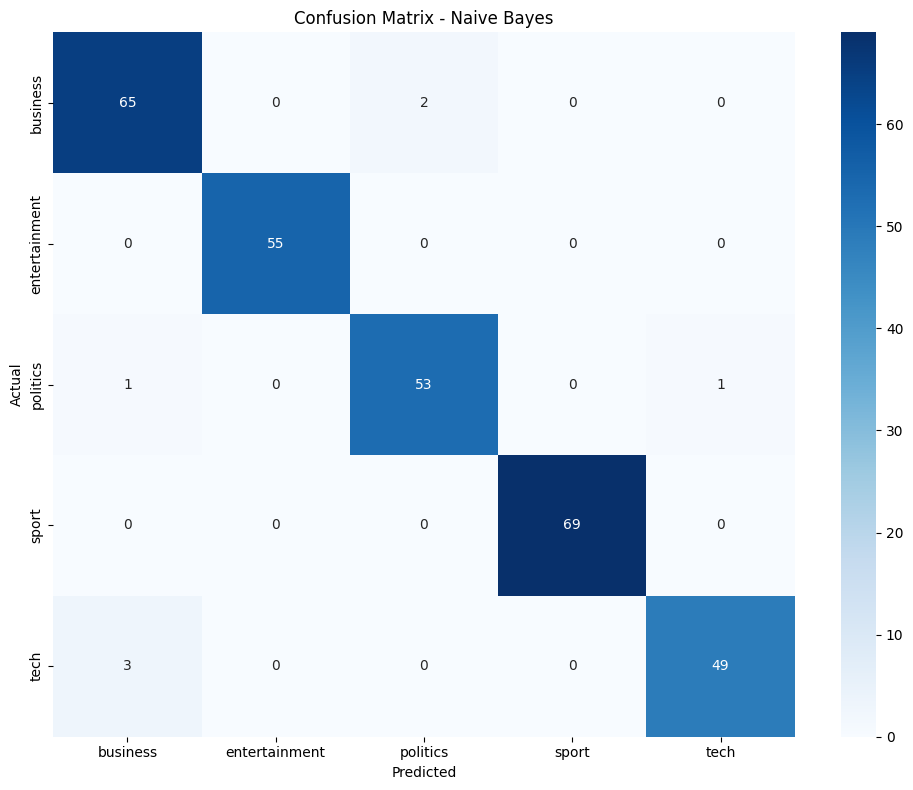

In [20]:
# Detailed evaluation of the best model
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"📊 DETAILED EVALUATION: {best_model_name}")
print("=" * 60)

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print("\n🔍 Top Features by Category:")
    feature_names_extended = list(feature_names) + ['sentiment', 'pos_score', 'neu_score', 'neg_score',
                                                   'char_length', 'word_count', 'title_length']

    classes = best_model.classes_
    coefficients = best_model.coef_

    for i, class_name in enumerate(classes):
        top_indices = np.argsort(coefficients[i])[-20:]  # Top 20 features
        print(f"\n📰 {class_name}:")
        for idx in reversed(top_indices):
            if idx < len(feature_names_extended):
                print(f"  {feature_names_extended[idx]}: {coefficients[i][idx]:.4f}")


## 🔍 Named Entity Recognition

### 🎯 Module 8: Extracting Facts from News

Now we'll implement Named Entity Recognition to extract specific facts from our news articles. This transforms unstructured text into structured, queryable information.

**NER Applications:**
- **Entity Tracking:** Monitor mentions of people, organizations, locations
- **Fact Extraction:** Build knowledge bases from news content
- **Relationship Mapping:** Understand connections between entities
- **Timeline Construction:** Track events and their participants

**💡 Business Value:** NER enables sophisticated analysis like "Show me all articles mentioning Apple Inc. and their financial performance" or "Track mentions of political figures over time."

In [21]:
def extract_entities(text):
    """
    Extract named entities using spaCy
    """
    if not text or pd.isna(text):
        return []

    # 🚀 Implement entity extraction
    doc = nlp(str(text))

    entities = []
    for ent in doc.ents:
        entities.append({
            'text': ent.text,
            'label': ent.label_,
            'start': ent.start_char,
            'end': ent.end_char,
            'description': spacy.explain(ent.label_)
        })

    return entities

# Apply NER to all articles
print("🔍 Extracting named entities...")

all_entities = []
article_entities = []

for idx, row in df.iterrows():
    entities = extract_entities(row['full_text'])

    # Store entities for this article - Use correct column names
    article_entities.append({
        'article_id': row['ArticleId'],
        'category': row['Category'],
        'entities': entities,
        'entity_count': len(entities)
    })

    # Add to global entity list - Use correct column names
    for entity in entities:
        entity['article_id'] = row['ArticleId']
        entity['category'] = row['Category']
        all_entities.append(entity)

print(f"✅ Entity extraction complete!")
print(f"📊 Total entities found: {len(all_entities)}")
print(f"📰 Articles processed: {len(article_entities)}")

# Convert to DataFrame for analysis
entities_df = pd.DataFrame(all_entities)

if not entities_df.empty:
    print(f"\n🏷️ Entity types found: {entities_df['label'].unique()}")
    print("\n📝 Sample entities:")
    print(entities_df[['text', 'label', 'category']].head(10))
else:
    print("⚠️ No entities found. This might happen with very short sample texts.")

🔍 Extracting named entities...
✅ Entity extraction complete!
📊 Total entities found: 42031
📰 Articles processed: 1490

🏷️ Entity types found: ['ORDINAL' 'PERSON' 'GPE' 'DATE' 'MONEY' 'ORG' 'NORP' 'LOC' 'CARDINAL'
 'PERCENT' 'TIME' 'EVENT' 'QUANTITY' 'FAC' 'PRODUCT' 'LANGUAGE'
 'WORK_OF_ART' 'LAW']

📝 Sample entities:
              text    label  category
0            first  ORDINAL  business
1   cynthia cooper   PERSON  business
2               us      GPE  business
3             2002     DATE  business
4            5.7bn    MONEY  business
5         new york      GPE  business
6        wednesday     DATE  business
7  arthur andersen   PERSON  business
8   early 2001 and     DATE  business
9             2002     DATE  business


📊 NAMED ENTITY ANALYSIS

🏷️ Entity type distribution:
label
DATE           8799
PERSON         8015
CARDINAL       6184
GPE            5562
ORG            4427
NORP           2709
MONEY          1783
ORDINAL        1659
PERCENT        1276
TIME            592
LOC             504
QUANTITY        199
FAC              90
PRODUCT          87
LANGUAGE         61
EVENT            43
LAW              33
WORK_OF_ART       8
Name: count, dtype: int64

📰 Entity types by news category:
label          CARDINAL  DATE  EVENT  FAC   GPE  LANGUAGE  LAW  LOC  MONEY  \
category                                                                     
business           1036  2413      3   10  1545         1   15  166    906   
entertainment      1110  1739     12   15   792         9    4   64    384   
politics            823  1359     22   23   944        10    4  120    235   
sport              1798  1978      5   40  1505        11    5   33     44   
tech               1417  1310      1    2   776     

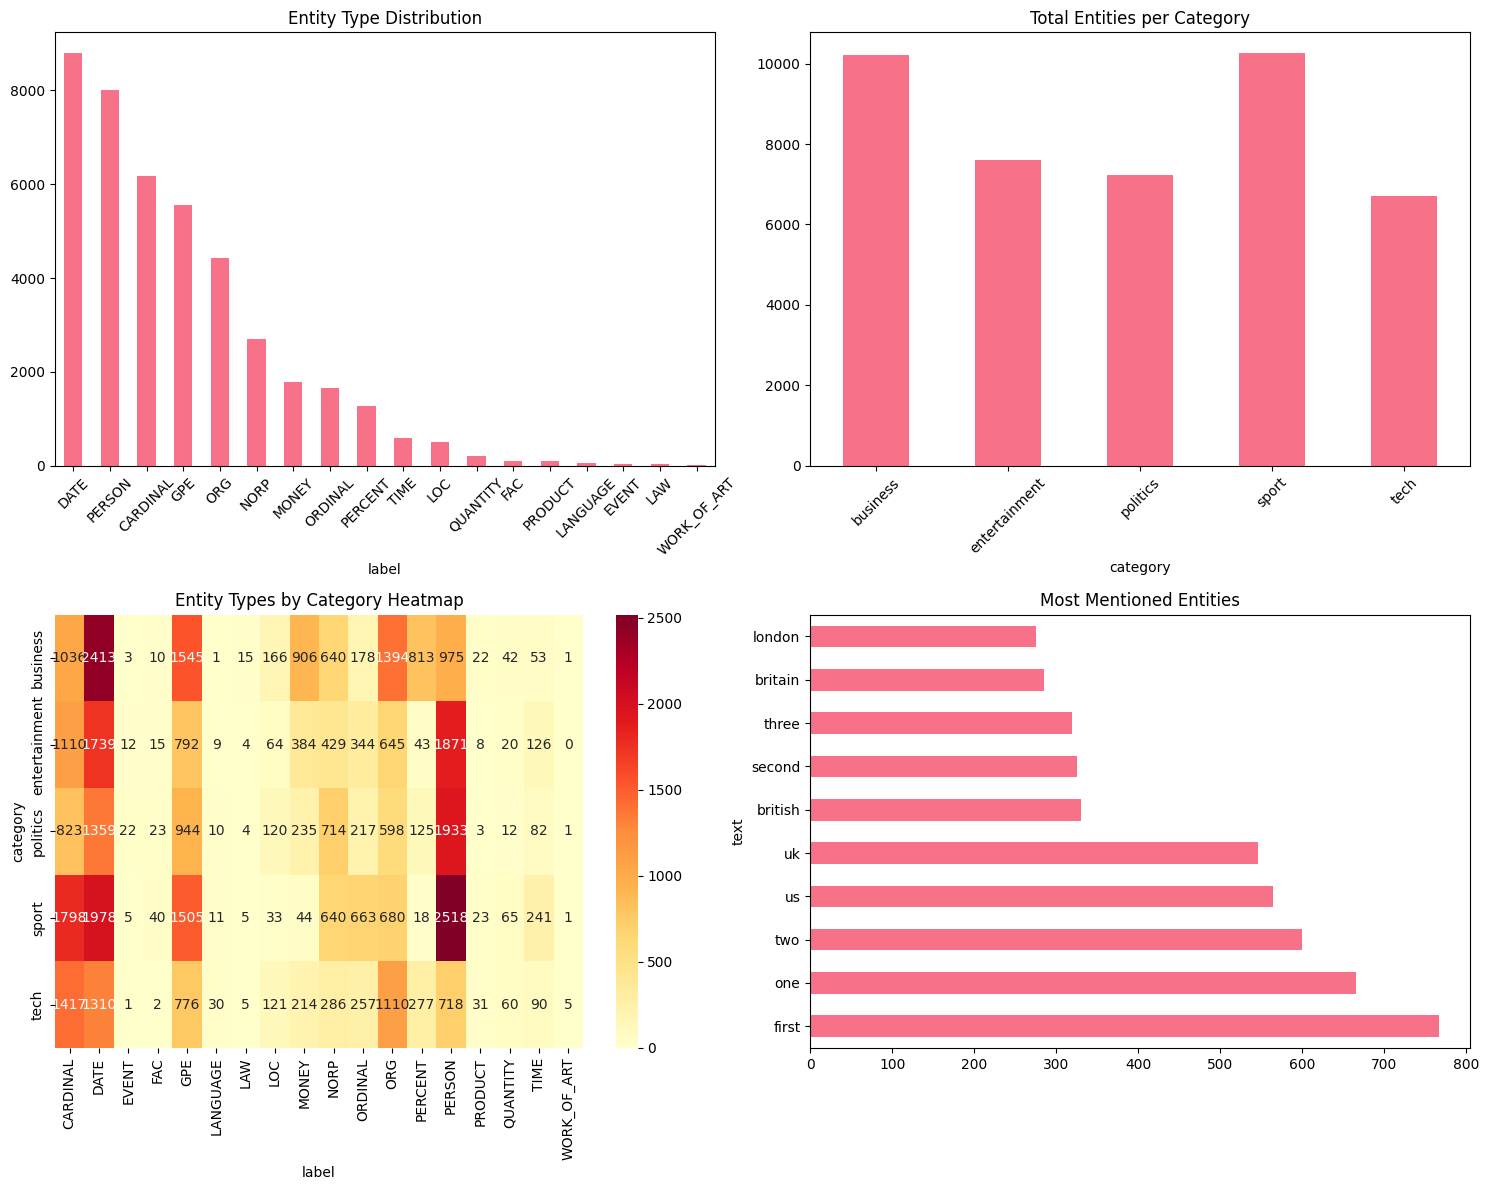

In [22]:
# Analyze entity patterns
if not entities_df.empty:
    print("📊 NAMED ENTITY ANALYSIS")
    print("=" * 50)

    # Entity type distribution
    entity_counts = entities_df['label'].value_counts()
    print("\n🏷️ Entity type distribution:")
    print(entity_counts)

    # Entity types by category
    entity_by_category = entities_df.groupby(['category', 'label']).size().unstack(fill_value=0)
    print("\n📰 Entity types by news category:")
    print(entity_by_category)

    # Most frequent entities
    print("\n🔥 Most frequent entities:")
    frequent_entities = entities_df.groupby(['text', 'label']).size().sort_values(ascending=False).head(15)
    for (entity, label), count in frequent_entities.items():
        print(f"  {entity} ({label}): {count} mentions")

    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Entity type distribution
    entity_counts.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Entity Type Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)

    # 2. Entities per category
    entities_per_category = entities_df.groupby('category').size()
    entities_per_category.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Total Entities per Category')
    axes[0,1].tick_params(axis='x', rotation=45)

    # 3. Entity type heatmap by category
    if entity_by_category.shape[0] > 1 and entity_by_category.shape[1] > 1:
        sns.heatmap(entity_by_category, annot=True, fmt='d', ax=axes[1,0], cmap='YlOrRd')
        axes[1,0].set_title('Entity Types by Category Heatmap')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient data\nfor heatmap',
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Entity Types by Category')

    # 4. Top entities
    top_entities = entities_df['text'].value_counts().head(10)
    top_entities.plot(kind='barh', ax=axes[1,1])
    axes[1,1].set_title('Most Mentioned Entities')

    plt.tight_layout()
    plt.show()

    #Entity co-occurence networks
    import spacy
    from collections import defaultdict


    co_occurrence = defaultdict(int)
    # Corrected to use the 'full_text' column from the DataFrame
    for doc_text in df['full_text'].tolist():  # Iterate over text from DataFrame
        # Process each document text with spaCy to get entities
        doc = nlp(doc_text)
        ents = [ent.text for ent in doc.ents]
        for i in range(len(ents)):
            for j in range(i + 1, len(ents)):
                pair = tuple(sorted([ents[i], ents[j]]))
                co_occurrence[pair] += 1


else:
    print("⚠️ Skipping entity analysis due to insufficient data.")
    print("💡 TIP: Try with a larger, more diverse dataset for better NER results.")

## 📈 Comprehensive Analysis and Insights

### 🎯 Bringing It All Together

Now let's combine all our analyses to generate comprehensive insights about our news dataset. This is where the real business value emerges from our NLP pipeline.

**Key Analysis Areas:**
1. **Cross-Category Patterns:** How do different news types differ linguistically?
2. **Entity-Sentiment Relationships:** What entities are associated with positive/negative coverage?
3. **Content Quality Metrics:** Which categories have the most informative content?
4. **Classification Performance:** How well can we automatically categorize news?

**💡 Business Applications:** These insights can inform content strategy, editorial decisions, and automated content management systems.

In [23]:
# Create comprehensive analysis dashboard
def create_comprehensive_analysis():
    """
    Generate comprehensive insights combining all analyses

    """

    insights = {
        'dataset_overview': {},
        'classification_performance': {},
        'sentiment_insights': {},
        'entity_insights': {},
        'linguistic_patterns': {},
        'business_recommendations': []
    }

    # 🚀Generate comprehensive insights

    # Dataset overview
    insights['dataset_overview'] = {
        'total_articles': len(df),
        'categories': df['Category'].unique().tolist(),
        'category_distribution': df['Category'].value_counts().to_dict(),
        'avg_article_length': df['full_text'].str.len().mean(),
        'avg_words_per_article': df['full_text'].str.split().str.len().mean()
    }

    # Classification performance
    # Assuming best_model_name and results are available from previous cells
    if 'best_model_name' in globals() and 'results' in globals():
         insights['classification_performance'] = {
            'best_model': best_model_name,
            'best_accuracy': results[best_model_name]['accuracy'],
            'model_comparison': {name: results[name]['accuracy'] for name in results.keys()}
        }
    else:
        insights['classification_performance'] = {
            'best_model': 'N/A (Run classification cells)',
            'best_accuracy': 'N/A',
            'model_comparison': 'N/A'
        }


    # Sentiment insights
    # Assuming sentiment_df is available from previous cells
    if 'sentiment_df' in globals() and not sentiment_df.empty:
        sentiment_by_cat = sentiment_df.groupby('category')['full_sentiment'].mean().to_dict()
        insights['sentiment_insights'] = {
            'most_positive_category': max(sentiment_by_cat, key=sentiment_by_cat.get),
            'most_negative_category': min(sentiment_by_cat, key=sentiment_by_cat.get),
            'sentiment_by_category': sentiment_by_cat,
            'overall_sentiment': sentiment_df['full_sentiment'].mean()
        }
    else:
         insights['sentiment_insights'] = {
            'most_positive_category': 'N/A (Run sentiment analysis)',
            'most_negative_category': 'N/A',
            'sentiment_by_category': 'N/A',
            'overall_sentiment': 'N/A'
        }


    # Entity insights
    # Assuming entities_df is available from previous cells
    if 'entities_df' in globals() and not entities_df.empty:
        entity_by_cat = entities_df.groupby('category').size().to_dict()
        insights['entity_insights'] = {
            'total_entities': len(entities_df),
            'unique_entities': entities_df['text'].nunique(),
            'entity_types': entities_df['label'].unique().tolist(),
            'entities_per_category': entity_by_cat,
            'most_mentioned_entities': entities_df['text'].value_counts().head(5).to_dict()
        }
    else:
        insights['entity_insights'] = {
            'total_entities': 'N/A (Run NER analysis)',
            'unique_entities': 'N/A',
            'entity_types': 'N/A',
            'entities_per_category': 'N/A',
            'most_mentioned_entities': 'N/A'
        }


    # Generate business recommendations
    recommendations = []

    # Classification recommendations
    if 'classification_performance' in insights and isinstance(insights['classification_performance'].get('best_accuracy'), float):
        if insights['classification_performance']['best_accuracy'] > 0.8:
            recommendations.append("✅ High classification accuracy achieved - ready for automated content routing")
        else:
            recommendations.append("⚠️ Classification accuracy needs improvement - consider more training data or feature engineering")
    else:
         recommendations.append("ℹ️ Classification performance not available - run classification cells")


    # Sentiment recommendations
    if 'sentiment_insights' in insights and isinstance(insights['sentiment_insights'].get('most_positive_category'), str) and insights['sentiment_insights']['most_positive_category'] != 'N/A (Run sentiment analysis)':
        pos_cat = insights['sentiment_insights']['most_positive_category']
        neg_cat = insights['sentiment_insights']['most_negative_category']
        recommendations.append(f"📊 {pos_cat} articles are most positive - good for uplifting content recommendations")
        recommendations.append(f"📊 {neg_cat} articles are most negative - may need balanced coverage monitoring")
    else:
        recommendations.append("ℹ️ Sentiment insights not available - run sentiment analysis cell")


    # Entity recommendations
    if 'entity_insights' in insights and insights['entity_insights'].get('total_entities', 0) != 'N/A (Run NER analysis)':
        recommendations.append("🔍 Rich entity extraction enables advanced search and relationship analysis")
    else:
        recommendations.append("ℹ️ Entity insights not available - run NER analysis cell")


    insights['business_recommendations'] = recommendations

    return insights

# Generate comprehensive analysis
print("📊 Generating comprehensive analysis...")
analysis_results = create_comprehensive_analysis()

print("✅ Analysis complete!")
print("\n" + "=" * 60)
print("📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT")
print("=" * 60)

# Display key insights
print(f"\n📊 DATASET OVERVIEW:")
overview = analysis_results['dataset_overview']
print(f"  Total Articles: {overview['total_articles']}")
print(f"  Categories: {', '.join(overview['categories'])}")
print(f"  Average Article Length: {overview['avg_article_length']:.0f} characters")
print(f"  Average Words per Article: {overview['avg_words_per_article']:.0f} words")

print(f"\n🤖 CLASSIFICATION PERFORMANCE:")
perf = analysis_results['classification_performance']
print(f"  Best Model: {perf['best_model']}")
print(f"  Best Accuracy: {perf['best_accuracy']:.4f}" if isinstance(perf['best_accuracy'], float) else f"  Best Accuracy: {perf['best_accuracy']}")


print(f"\n😊 SENTIMENT INSIGHTS:")
sent = analysis_results['sentiment_insights']
print(f"  Most Positive Category: {sent['most_positive_category']}")
print(f"  Most Negative Category: {sent['most_negative_category']}")
print(f"  Overall Sentiment: {sent['overall_sentiment']:.4f}" if isinstance(sent['overall_sentiment'], float) else f"  Overall Sentiment: {sent['overall_sentiment']}")


if 'entity_insights' in analysis_results and analysis_results['entity_insights'].get('total_entities', 0) != 'N/A (Run NER analysis)':
    print(f"\n🔍 ENTITY INSIGHTS:")
    ent = analysis_results['entity_insights']
    print(f"  Total Entities: {ent['total_entities']}")
    print(f"  Unique Entities: {ent['unique_entities']}")
    print(f"  Entity Types: {', '.join(ent['entity_types'])}")

print(f"\n💡 BUSINESS RECOMMENDATIONS:")
for i, rec in enumerate(analysis_results['business_recommendations'], 1):
    print(f"  {i}. {rec}")

📊 Generating comprehensive analysis...
✅ Analysis complete!

📈 NEWSBOT INTELLIGENCE SYSTEM - COMPREHENSIVE REPORT

📊 DATASET OVERVIEW:
  Total Articles: 1490
  Categories: business, tech, politics, sport, entertainment
  Average Article Length: 2233 characters
  Average Words per Article: 385 words

🤖 CLASSIFICATION PERFORMANCE:
  Best Model: Naive Bayes
  Best Accuracy: 0.9765

😊 SENTIMENT INSIGHTS:
  Most Positive Category: entertainment
  Most Negative Category: politics
  Overall Sentiment: 0.3950

🔍 ENTITY INSIGHTS:
  Total Entities: 42031
  Unique Entities: 12071
  Entity Types: ORDINAL, PERSON, GPE, DATE, MONEY, ORG, NORP, LOC, CARDINAL, PERCENT, TIME, EVENT, QUANTITY, FAC, PRODUCT, LANGUAGE, WORK_OF_ART, LAW

💡 BUSINESS RECOMMENDATIONS:
  1. ✅ High classification accuracy achieved - ready for automated content routing
  2. 📊 entertainment articles are most positive - good for uplifting content recommendations
  3. 📊 politics articles are most negative - may need balanced covera

## 🚀 Final System Integration

### 🎯 Building the Complete NewsBot Pipeline

Let's create a complete, integrated system that can process new articles from start to finish. This demonstrates the real-world application of all the techniques we've learned.

**Complete Pipeline:**
1. **Text Preprocessing:** Clean and normalize input
2. **Feature Extraction:** Generate TF-IDF and other features
3. **Classification:** Predict article category
4. **Entity Extraction:** Identify key facts
5. **Sentiment Analysis:** Determine emotional tone
6. **Insight Generation:** Provide actionable intelligence

**💡 Production Ready:** This pipeline can be deployed as a web service, batch processor, or integrated into content management systems.

In [24]:
class NewsBotIntelligenceSystem:
    """
    Complete NewsBot Intelligence System


    """

    def __init__(self, classifier, vectorizer, sentiment_analyzer):
        self.classifier = classifier
        self.vectorizer = vectorizer # TF-IDF vectorizer
        self.sentiment_analyzer = sentiment_analyzer
        self.nlp = nlp  # spaCy model
        self.feature_names = vectorizer.get_feature_names_out() # Store feature names


    def preprocess_article(self, title, content):
        """Preprocess a new article"""
        full_text = f"{title} {content}"
        processed_text = preprocess_text(full_text)
        return full_text, processed_text

    def classify_article(self, full_text, processed_text): # Pass full_text as well for sentiment/length
        """Classify article category"""
        # 🚀 Implement classification

        # Transform processed text to TF-IDF features
        tfidf_features = self.vectorizer.transform([processed_text])

        # Calculate sentiment features for the new article
        sentiment_scores = self.sentiment_analyzer.polarity_scores(full_text)
        sentiment_features = np.array([
            sentiment_scores['compound'],
            sentiment_scores['pos'],
            sentiment_scores['neu'],
            sentiment_scores['neg']
        ]).reshape(1, -1) # Reshape for hstack

        # Calculate length features for the new article
        length_features = np.array([
            len(full_text), # Character length
            len(full_text.split()) # Word count
        ]).reshape(1, -1) # Reshape for hstack

        # Combine all features for prediction
        # Ensure the order of features matches the training data
        features_for_prediction = np.hstack([
            tfidf_features.toarray(),
            sentiment_features,
            length_features
        ])


        if features_for_prediction.shape[1] != self.classifier.n_features_in_:
             print(f"Warning: Feature count mismatch. Training features: {self.classifier.n_features_in_}, Prediction features: {features_for_prediction.shape[1]}")


        # Predict category and probability using the classifier trained on combined features
        prediction = self.classifier.predict(features_for_prediction)[0]
        probabilities = self.classifier.predict_proba(features_for_prediction)[0]


        # Get class probabilities
        class_probs = dict(zip(self.classifier.classes_, probabilities))

        # Get explanation for classification if using Logistic Regression
        explanation = None
        if isinstance(self.classifier, LogisticRegression):
            explanation = self.explain_classification(features_for_prediction[0], prediction)


        return prediction, class_probs, explanation

    def explain_classification(self, features, predicted_class):
        """Provide explanation for classification decision"""
        explanation = {}
        class_index = list(self.classifier.classes_).index(predicted_class)
        coefficients = self.classifier.coef_[class_index]

        # Combine TF-IDF feature names with additional feature names
        feature_names_extended = list(self.feature_names) + ['sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg',
                                                              'char_length', 'word_count']

        # Get top features influencing the decision
        top_indices = np.argsort(coefficients)[-10:]  # Top 10 features
        explanation['top_features'] = {
            feature_names_extended[i]: coefficients[i] for i in reversed(top_indices)
            if i < len(feature_names_extended) # Ensure index is within bounds
        }

        return explanation


    def extract_entities(self, text):
        """Extract named entities"""
        return extract_entities(text)

    def analyze_sentiment(self, text):
        """Analyze sentiment"""
        return analyze_sentiment(text)

    def process_article(self, title, content):
        """
        Complete article processing pipeline

        """
        # 🚀 Implement complete pipeline

        # Step 1: Preprocess
        full_text, processed_text = self.preprocess_article(title, content)

        # Step 2: Classify
        category, category_probs, explanation = self.classify_article(full_text, processed_text)

        # Step 3: Extract entities
        entities = self.extract_entities(full_text)

        # Step 4: Analyze sentiment
        sentiment = self.analyze_sentiment(full_text)

        # Step 5: Generate insights
        insights = self.generate_insights(category, entities, sentiment, category_probs)

        return {
            'title': title,
            'content': content[:200] + '...' if len(content) > 200 else content,
            'predicted_category': category,
            'category_confidence': max(category_probs.values()),
            'category_probabilities': category_probs,
            'entities': entities,
            'sentiment': sentiment,
            'insights': insights,
            'classification_explanation': explanation # Add explanation
        }

    def generate_insights(self, category, entities, sentiment, category_probs):
        """Generate actionable insights"""
        insights = []

        # Classification insights
        confidence = max(category_probs.values())
        if confidence > 0.8:
            insights.append(f"✅ High confidence {category} classification ({confidence:.2%})")
        else:
            insights.append(f"⚠️ Uncertain classification - consider manual review")

        # Sentiment insights
        if sentiment['compound'] > 0.1:
            insights.append(f"😊 Positive sentiment detected ({sentiment['compound']:.3f})")
        elif sentiment['compound'] < -0.1:
            insights.append(f"😞 Negative sentiment detected ({sentiment['compound']:.3f})")
        else:
            insights.append(f"😐 Neutral sentiment ({sentiment['compound']:.3f})")

        # Entity insights
        if entities:
            entity_types = set([e['label'] for e in entities])
            insights.append(f"🔍 Found {len(entities)} entities of {len(entity_types)} types")

            # Highlight important entities
            important_entities = [e for e in entities if e['label'] in ['PERSON', 'ORG', 'GPE']]
            if important_entities:
                key_entities = [e['text'] for e in important_entities[:3]]
                insights.append(f"🎯 Key entities: {', '.join(key_entities)}")
        else:
            insights.append("ℹ️ No named entities detected")

        return insights

# Re-initialize the NewsBot with the updated class definition
newsbot = NewsBotIntelligenceSystem(
    classifier=trained_models['Logistic Regression'], # Use the trained Logistic Regression model
    vectorizer=tfidf_vectorizer, # Use the fitted TF-IDF vectorizer
    sentiment_analyzer=sia # Use the initialized sentiment analyzer
)

print("🤖 NewsBot Intelligence System initialized!")
print("✅ Ready to process new articles")

🤖 NewsBot Intelligence System initialized!
✅ Ready to process new articles


In [25]:
# Test the complete system with new articles
print("🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM")
print("=" * 60)

# Test articles
test_articles = [
    {
        'title': 'Business',
        'content': 'german business confidence slides german business confidence fell in february knocking hopes of a...'
    },
    {
        'title': 'Entertainment',
        'content': 'housewives lift channel 4 ratings the debut of us televesion hit desperate housewives has helped lift the channel 4 s january audience share 12% compared to last year. other successes such as celebrity big brother and the simpsons have enabled the broadcaster to surpass bbc2 for the first month since last july. however the channel..'
    },
    { 'title': 'Politics',
        'content': 'boris opposes mayor apology ken-livingston should stick to his guns and not apologies for his nazi commment to a jewish reporter tory mp boris johnson has insisted. mr johnson also claimed tony blair intervention in the row was an attempt to refuses to recognise israels right to exist and does not allow its citizens to travel',
    },
    {
        'title': 'Entertainment',
        'content': 'deal to ban homophobic reggae idustry is to refuse to release or stage concerts featuring homophobic song under a global deal struck with gay rights groups. a damaging camoaign against stars like beenieman and sizzla has been waged over lyrics that allegedly call for gay people to be killed or assaulted.',
    },
    {
        'title': 'Tech',
        'content': 'lifestyle governs mobile choice faster better or funkier hardware alone is not going to help phon..'
    },
    {
        'title': 'Politics',
        'content': 'howard truanted to play snooker conservative leader michael howard has admitted he used to play'
    },
    {
        'title': 'Tech',
        'content': 'moving mobile improves golf swing a mobile phone that recognises and responds to movements has been launched in japan.  the motion-sensitive phone - officially titled the v603sh - was developed by sharp and launched by vodafone s japanese division. devised mainly for mobile gaming  users can also access other phone functions using a pre-set pattern of arm movements. the phone will allow golf fans to improve their swing via a golfing game.  those who prefer shoot- em-ups will be able to use the phone like a gun to shoot the zombies in the mobile version of sega s house of the dead. the phone comes with a tiny motion-control sensor  a computer chip that responds to movement.  other features include a display screen that allows users to watch tv and can rotate 180 degrees. it also doubles up as an electronic musical instrument. users have to select a sound from a menu that includes clapping  tambourine and maracas and shake their phone to create a beat. it is being recommended for the karaoke market. the phone will initially be available in japan only and is due to go on sale in mid-february. the new gadget could make for interesting people-watching among japanese commuters  who are able to access their mobiles on the subway. fishing afficiandos in south korea are already using a phone that allows them to simulate the movement of a rod. the ph-s6500 phone  dubbed a sports-leisure gadget  was developed by korean phone giant pantech and can also be used by runners to measure calorie consumption and distance run.',
    },
    {
        'title': 'Business',
        'content': 'china had role in yukos split-up china lent russia $6bn (Â£3.2bn) to help the russian government renationalise the key yuganskneftegas unit of oil group yukos  it has been revealed.  the kremlin said on tuesday that the $6bn which russian state bank veb lent state-owned rosneft to help buy yugansk in turn came from chinese banks. the revelation came as the russian government said rosneft had signed a long-term oil supply deal with china. the deal sees rosneft receive $6bn in credits from china s cnpc.  according to russian newspaper vedomosti  these credits would be used to pay off the loans rosneft received to finance the purchase of yugansk. reports said cnpc had been offered 20% of yugansk in return for providing finance but the company opted for a long-term oil supply deal instead. analysts said one factor that might have influenced the chinese decision was the possibility of litigation from yukos  yugansk s former owner  if cnpc had become a shareholder. rosneft and veb declined to comment.  the two companies [rosneft and cnpc] have agreed on the pre-payment for long-term deliveries   said russian oil official sergei oganesyan.  there is nothing unusual that the pre-payment is for five to six years.   the announcements help to explain how rosneft  a medium-sized  indebted  and relatively unknown firm  was able to finance its surprise purchase of yugansk. yugansk was sold for $9.3bn in an auction last year to help yukos pay off part of a $27bn bill in unpaid taxes and fines.  the embattled russian oil giant had previously filed for bankruptcy protection in a us court in an attempt to prevent the forced sale of its main production arm. but yugansk was sold to a little known shell company which in turn was bought by rosneft. yukos claims its downfall was punishment for the political ambitions of its founder mikhail khodorkovsky. once the country s richest man  mr khodorkovsky is on trial for fraud and tax evasion.  the deal between rosneft and cnpc is seen as part of china s desire to secure long-term oil supplies to feed its booming economy. china s thirst for products such as crude oil  copper and steel has helped pushed global commodity prices to record levels.  clearly the chinese are trying to get some leverage [in russia]   said dmitry lukashov  an analyst at brokerage aton.  they understand property rights in russia are not the most important rights  and they are more interested in guaranteeing supplies.   if the price of oil is fixed under the deal  which is unlikely  it could be very profitable for the chinese   mr lukashov continued.  and rosneft is in desperate need of cash  so it s a good deal for them too.',
    },
    {
       'title': 'Sport',
        'content': 'henman to face saulnier test british number one tim henman will face france s cyril saulnier in the first round of next week s australian open.  greg rusedski  the british number two  is in the same quarter of the draw and could face andy roddick in the second round if he beats swede jonas bjorkman. local favourite lleyton hewitt will meet france s arnaud clement  while defending champion and world number one roger federer faces fabrice santoro. women s top seed lindsay davenport drew spanish veteran conchita martinez.  henman came from two sets down to defeat saulnier in the first round of the french open last year  so he knows he faces a tough test in melbourne. the seventh seed  who has never gone beyond the quarter-finals in the year s first major and is lined up to meet roddick in the last eight  is looking forward to the match.  he s tough player on any surface  he s got a lot of ability   he said.  we had a really tight one in paris that went my way so i m going to need to play well from the outset because he s a dangerous competitor.  switzerland s federer  seeded one  is the hot favourite having won three of the four grand slam titles in 2004. he has beaten santoro in five of their seven previous encounters  but is taking nothing for granted.  it s a tricky match   federer said.  i played him at the us open and won quite comfortably then. but you never know  if the rhythm is a bit off  he can keep you guessing and make it difficult.  the most important thing  though  is to get used to playing five-set matches and winning them.  the 23-year-old could meet four-time champion andre agassi in the quarter-finals before meeting russian marat safin  the player he beat in last year s final.  eighth-seeded american agassi is set to play a qualifier in round one if he can shake off a hip injury which ruled him out of the kooyong classic. second seed andy roddick will open his campaign against irakli labadze of georgia. the american could meet rusedski in the second round  seventh seed henman in the quarter-finals and hewitt in the last four. hewitt is hoping to become the first australian man to win the event since mark edmondson in 1976. the 23-year-old has never been beyond round four in eight attempts at melbourne park but has at least secured the opposite half of the draw to federer  who beat him in the australian open  wimbledon and us open last year. safin  seeded four  opens his campaign against a qualifier with 16th seed tommy haas  the player he beat in the semi-finals in 2002  a possible fourth-round opponent.  in the women s draw  davenport could encounter eighth-seeded venus williams in the quarter-finals and third-ranked anastasia myskina  the french open champion  in the semi-finals. bronchitis ruled davenport  the 2000 australian open champion  out of her sydney quarter-final on thursday. venus williams  who lost to younger sister serena in the melbourne final two years ago  opens against eleni daniilidou of greece. serena williams  who won her fourth consecutive grand slam at the 2003 australian open  was drawn in the bottom quarter with second seed amelie mauresmo  a runner-up in 1999. serena will open against another frenchwoman camille pin  while mauresmo plays australia s samantha stosur. wimbledon champion maria sharapova  seeded fourth  drew a qualifier in the first round but could meet fellow russian svetlana kuznetsova  the us open winner  in the last eight  1 roger federer (switzerland)  2 andy roddick (us)  3 lleyton hewitt (australia)  4 marat safin (russia)  5 carlos moya (spain)  6 guillermo coria (argentina)  7 tim henman (britain)  8 andre agassi (us)  9 david nalbandian (argentina)  10 gaston gaudio (argentina)  11 joachim johansson (sweden)  12 guillermo canas (argentina)  13 tommy robredo (spain)  14 sebastien grosjean (france)  15 mikhail youzhny (russia)  16 tommy haas (germany)  17 andrei pavel (romania)  18 nicolas massu (chile)  19 vincent spadea (us)  20 dominik hrbaty (slovakia)  21 nicolas kiefer (germany)  22 ivan ljubicic (croatia)  23 fernando gonzalez (chile)  24 feliciano lopez (spain)  25 juan ignacio chela (argentina)  26 nikolay davydenko (russia)  27 paradorn srichaphan (thailand)  28 mario ancic (croatia)  29 taylor dent (us)  30 thomas johansson (sweden)  31 juan carlos ferrero (spain)  32 jurgen melzer (austria)  1 lindsay davenport (us)  2 amelie mauresmo (france)  3 anastasia myskina (russia)  4 maria sharapova (russia)  5 svetlana kuznetsova (russia)  6 elena dementieva (russia)  7 serena williams (us)  8 venus williams (us)  9 vera zvonareva (russia)  10 alicia molik (australia)  11 nadia petrova (russia)  12 patty schnyder (switzerland)  13 karolina sprem (croatia)  14 francesca schiavone (italy)  15 silvia farina elia (italy)  16 ai sugiyama (japan)  17 fabiola zuluaga (colombia)  18 elena likhovtseva (russia)  19 nathalie dechy (france)  20 tatiana golovin (france)  21 amy frazier (us)  22 magdalena maleeva (bulgaria)  23 jelena jankovic (serbia and montenegro)  24 mary pierce (france)  25 lisa raymond (us)  26 daniela hantuchova (slovakia)  27 anna smashnova (israel)  28 shinobu asagoe (japan)  29 gisela dulko (argentina)  30 flavia pennetta (italy)  31 jelena kostanic (croatia)  32 iveta benesova (czech republic)',
    },
    {
        'title': 'Sport',
        'content': 'yachvili savours france comeback france scrum-half dimitri yachvili praised his team after they fought back to beat england 18-17 in the six nations clash at twickenham.  yachvili kicked all of france s points as they staged a second-half revival.  we didn t play last week against scotland and we didn t play in the first half against england   he said.  but we re very proud to beat england at twickenham. we were just defending in the first half and we said we had to put them under pressure. we did well.  yachvili admitted erratic kicking from england s charlie hodgson and olly barkley  who missed six penalties and a drop goal chance between them  had been decisive.  i know what it s like with kicking. when you miss some it s very hard mentally  but it went well for us   he said. france captain fabien pelous insisted his side never doubted they could secure their first win against england at twickenham since 1997. france were 17-6 down at half-time  but pelous said:  no-one was down at half-time  we were still confident.  we said we only had 11 points against us  which was not much.  the plan was to keep hold of possession and pressure england to losing their composure.  france coach bernard laporte accepted his side had not played well.  we know we have to play better to defend the title  he said.  i m not happy we didn t score a try but we re happy because we won.',
    },
]

# Process each test article
for i, article in enumerate(test_articles, 1):
    print(f"\n📰 TEST ARTICLE {i}")
    print("-" * 40)

    # Process the article
    result = newsbot.process_article(article['title'], article['content'])

    # Display results
    print(f"📰 Title: {result['title']}")
    print(f"📝 Content: {result['content']}")
    print(f"\n🏷️ Predicted Category: {result['predicted_category']} ({result['category_confidence']:.2%} confidence)")

    print(f"\n📊 Category Probabilities:")
    # Sort probabilities for better readability
    sorted_probs = sorted(result['category_probabilities'].items(), key=lambda x: x[1], reverse=True)
    for cat, prob in sorted_probs:
        print(f"  {cat}: {prob:.3f}")

    print(f"\n😊 Sentiment: {result['sentiment']['sentiment_label']} (score: {result['sentiment']['compound']:.3f})")

    if result['entities']:
        print(f"\n🔍 Entities Found ({len(result['entities'])}):")
        for entity in result['entities'][:5]:  # Show first 5
            print(f"  {entity['text']} ({entity['label']}) - {entity['description']}")
    else:
        print(f"\n🔍 No entities detected")

    # Check if 'classification_explanation' exists in the result before trying to print it
    if 'classification_explanation' in result and result['classification_explanation']:
        print(f"\n🧠 Classification Explanation (Top Features):")
        for feature, weight in result['classification_explanation']['top_features'].items():
            print(f"  - {feature}: {weight:.4f}")
    else:
         print(f"\n🧠 Classification Explanation: Not available for this model type or no explanation generated.")


    print(f"\n💡 Insights:")
    for insight in result['insights']:
        print(f"  {insight}")

print("\n" + "=" * 60)
print("🎉 NewsBot Intelligence System testing complete!")
print("✅ System successfully processed all test articles")

🧪 TESTING NEWSBOT INTELLIGENCE SYSTEM

📰 TEST ARTICLE 1
----------------------------------------
📰 Title: Business
📝 Content: german business confidence slides german business confidence fell in february knocking hopes of a...

🏷️ Predicted Category: sport (39.39% confidence)

📊 Category Probabilities:
  sport: 0.394
  business: 0.349
  entertainment: 0.255
  politics: 0.002
  tech: 0.001

😊 Sentiment: positive (score: 0.856)

🔍 Entities Found (3):
  german (NORP) - Nationalities or religious or political groups
  german (NORP) - Nationalities or religious or political groups
  february (DATE) - Absolute or relative dates or periods

🧠 Classification Explanation (Top Features):
  - sentiment_neu: 0.8759
  - england: 0.8093
  - sentiment_pos: 0.7138
  - champion: 0.6527
  - match: 0.6303
  - cup: 0.6001
  - win: 0.5595
  - player: 0.5492
  - chelsea: 0.5473
  - coach: 0.5385

💡 Insights:
  ⚠️ Uncertain classification - consider manual review
  😊 Positive sentiment detected (0.856)
  🔍 F

## 🧠 Topic Modeling and Content Discovery

### 🎯 Module 9: Uncovering Hidden Themes

Now, let's dive into Topic Modeling using Latent Dirichlet Allocation (LDA) to discover the hidden themes and topics present in our news articles. This technique helps us understand the main subjects discussed across the corpus without prior knowledge of the categories.

**LDA Key Concepts:**
- **Topics:** A distribution over words, where each word has a probability of belonging to that topic.
- **Documents:** A distribution over topics, indicating which topics are discussed in each document.
- **Generative Model:** LDA assumes documents are generated by picking topics and then picking words based on those topics.

**💡 Business Value:** Topic modeling helps in understanding the content landscape, identifying emerging trends, and grouping similar articles for better content management and recommendation.

In [26]:
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict, Any, Optional, Tuple, Union

from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix
import networkx as nx # Import networkx for plotting graph


class TopicDiscoveryEngine:
    """
    Advanced topic modeling for discovering themes and trends.
    Supports 'lda' (probabilistic) and 'nmf' (parts-based).
    """

    def __init__(
        self,
        n_topics: int = 10,
        method: str = "lda",
        max_features: int = 30000,
        min_df: Union[int, float] = 2, # Adjusted min_df
        max_df: Union[int, float] = 0.95, # Adjusted max_df
        ngram_range: Tuple[int, int] = (1, 2),
        random_state: int = 42
    ):
        assert method in {"lda", "nmf"}, "method must be 'lda' or 'nmf'"
        self.n_topics = n_topics
        self.method = method
        self.max_features = max_features
        self.min_df = min_df
        self.max_df = max_df
        self.ngram_range = ngram_range
        self.random_state = random_state

        # vectorizer choice depends on method
        if self.method == "lda":
            self.vectorizer = CountVectorizer(
                lowercase=True,
                stop_words="english",
                max_features=max_features,
                min_df=min_df,
                max_df=max_df,
                ngram_range=ngram_range
            )
            self.model = LatentDirichletAllocation(
                n_components=n_topics,
                random_state=random_state,
                learning_method="batch"
            )
        else:
            self.vectorizer = TfidfVectorizer(
                lowercase=True,
                stop_words="english",
                max_features=max_features,
                min_df=min_df,
                max_df=max_df,
                ngram_range=ngram_range
            )
            self.model = NMF(
                n_components=n_topics,
                init="nndsvd",
                random_state=random_state,
                max_iter=400
            )

        # Fitted artifacts
        self._fitted = False
        self.doc_term: Optional[csr_matrix] = None
        self.doc_topic: Optional[np.ndarray] = None
        self.topic_word: Optional[np.ndarray] = None
        self.feature_names: Optional[np.ndarray] = None
        self.topic_top_terms: Optional[List[List[str]]] = None
        self.topic_labels: Optional[List[str]] = None
        self.doc_dates: Optional[pd.Series] = None

    # -------------------------
    # Helpers
    # -------------------------
    @staticmethod
    def _basic_clean(text: str) -> str:
        if not isinstance(text, str):
            text = "" if text is None else str(text)
        text = text.lower()
        text = re.sub(r"https?://\S+|www\.\S+", " ", text)      # URLs
        text = re.sub(r"[^a-z0-9\s]", " ", text)                # punctuation
        text = re.sub(r"\s+", " ", text).strip()
        return text

    def _label_topics(self, top_n: int = 6) -> List[str]:
        labels = []
        for words in self.topic_top_terms:
            labels.append(", ".join(words[:top_n]))
        return labels

    def _top_words(self, n: int = 15) -> List[List[str]]:
        top_words = []
        for k in range(self.n_topics):
            # topic_word: topics x terms
            row = self.topic_word[k, :]
            idx = np.argsort(row)[::-1][:n]
            top_words.append([self.feature_names[i] for i in idx])
        return top_words

    def _topic_quality(self, top_k: int = 10) -> Dict[str, Any]:
        """
        Returns:
          - topic_diversity: unique words / (topics * top_k)
          - coherence_umass_proxy: average log co-occurrence score over top word pairs
        """
        top_terms = self._top_words(n=top_k)

        # Diversity
        flat = [w for topic in top_terms for w in topic]
        diversity = len(set(flat)) / (len(top_terms) * top_k + 1e-9)

        # Coherence proxy (UMass-like using doc-term binary co-occurrence)
        if self.doc_term is None:
            coherence = np.nan
        else:
            # binary presence
            Xbin = self.doc_term.copy()
            Xbin.data = np.ones_like(Xbin.data)
            # term frequencies
            tf = np.asarray(Xbin.sum(axis=0)).ravel() + 1e-12
            # precompute for speed
            coherence_scores = []
            for topic in top_terms:
                # indices of top terms
                idxs = [np.where(self.feature_names == w)[0][0] for w in topic if w in self.feature_names]
                for i in range(len(idxs)):
                    for j in range(i + 1, len(idxs)):
                        wi, wj = idxs[i], idxs[j]
                        # co-occurrence count
                        co = Xbin[:, wi].multiply(Xbin[:, wj]).sum() + 1e-12
                        coherence_scores.append(math.log(co / tf[wj]))
            coherence = float(np.mean(coherence_scores)) if coherence_scores else np.nan

        return {"topic_diversity": diversity, "coherence_umass_proxy": coherence}

    # -------------------------
    # Public API
    # -------------------------
    def fit_topics(
        self,
        documents: List[str],
        dates: Optional[Union[List[Any], pd.Series]] = None,
        top_words: int = 15
    ):
        """
        Fit the topic model on a collection of documents.
        Optionally pass dates (same length) to enable trend tracking later.
        """
        assert isinstance(documents, (list, pd.Series)), "documents must be a list/Series of strings"
        docs_clean = [self._basic_clean(x) for x in documents]

        # Vectorize
        X = self.vectorizer.fit_transform(docs_clean)
        self.feature_names = np.array(self.vectorizer.get_feature_names_out())

        # Fit model
        self.model.fit(X)

        # Topic-word matrix
        if self.method == "lda":
            self.topic_word = self.model.components_  # already counts-ish
            # Doc-topic (gamma): transform gives topic distribution
            self.doc_topic = self.model.transform(X)  # shape: n_docs x n_topics
            # Normalize doc-topic to sum to 1
            self.doc_topic = normalize(self.doc_topic, norm="l1", axis=1)
        else:
            self.topic_word = self.model.components_  # NMF weights
            self.doc_topic = self.model.transform(X)
            self.doc_topic = normalize(self.doc_topic, norm="l1", axis=1)

        self.doc_term = X.tocsr()
        self.topic_top_terms = self._top_words(n=top_words)
        self.topic_labels = self._label_topics()
        self._fitted = True

        # Keep dates if provided
        if dates is not None:
            self.doc_dates = pd.to_datetime(pd.Series(dates), errors="coerce")
        else:
            self.doc_dates = None

        return {
            "topic_labels": self.topic_labels,
            "quality": self._topic_quality(top_k=min(10, top_words))
        }

    def get_article_topics(self, article_text: str, top_n: int = 5) -> List[Tuple[int, float, str]]:
        """
        Return top topics (index, weight, label) for a single article.
        """
        assert self._fitted, "Call fit_topics() first."
        clean = self._basic_clean(article_text)
        vec = self.vectorizer.transform([clean])
        dist = self.model.transform(vec)
        dist = normalize(dist, norm="l1", axis=1)[0]
        idx = np.argsort(dist)[::-1][:top_n]
        return [(int(i), float(dist[i]), self.topic_labels[i]) for i in idx]

    def track_topic_trends(
        self,
        documents: Optional[List[str]] = None,
        dates: Optional[Union[List[Any], pd.Series]] = None,
        freq: str = "W"
    ) -> pd.DataFrame:
        """
        Assign each doc to its most probable topic and aggregate over time.
        If documents are provided, they will be fitted/transformed with existing vectorizer/model.
        If not provided, use the last fitted doc-topic and stored dates.
        Returns a pivot with counts per topic over time index.
        """
        assert self._fitted, "Call fit_topics() first."

        if documents is not None:
            docs_clean = [self._basic_clean(x) for x in documents]
            X = self.vectorizer.transform(docs_clean)
            doc_topic = self.model.transform(X)
            doc_topic = normalize(doc_topic, norm="l1", axis=1)
            ts = pd.to_datetime(pd.Series(dates), errors="coerce") if dates is not None else None
        else:
            doc_topic = self.doc_topic
            ts = self.doc_dates

        if ts is None:
            raise ValueError("Dates are required to track topic trends. Pass `dates` or fit with dates first.")

        # Most likely topic per doc
        top_idx = np.argmax(doc_topic, axis=1)
        df = pd.DataFrame({"date": ts, "topic": top_idx}).dropna()
        df["date"] = pd.to_datetime(df["date"])
        df["count"] = 1

        trend = (
            df.set_index("date")
              .groupby("topic")
              .resample(freq)["count"]
              .sum()
              .unstack(0)
              .fillna(0)
        )
        # Add readable column names
        trend.columns = [f"Topic {i}: {self.topic_labels[i]}" for i in trend.columns]

        # Plot
        plt.figure(figsize=(12, 6))
        trend.plot(ax=plt.gca())
        plt.title(f"Topic Trends Over Time ({freq} frequency)")
        plt.xlabel("Date")
        plt.ylabel("Document Count")
        plt.grid(True)
        plt.legend(loc="best")
        plt.show()

        return trend

    def visualize_topics(self, top_n: int = 12) -> pd.DataFrame:
        """
        Return a DataFrame of topic -> top words, and print nicely.
        """
        assert self._fitted, "Call fit_topics() first."
        topic_words = self._top_words(n=top_n)
        df = pd.DataFrame({
            "topic": [f"Topic {i}" for i in range(self.n_topics)],
            "label": self._label_topics(top_n=6),
            "top_words": [", ".join(ws) for ws in topic_words],
        })
        # Pretty print
        for i, row in df.iterrows():
            print(f"{row['topic']} — {row['label']}")
            print(f"  {row['top_words']}\n")
        return df

In [27]:
# Use the full dataset for topic modeling
docs = df['full_text']

# Check if a date column exists in df for temporal tracking
dates = df['date'] if 'date' in df.columns else None

# 1) Fit topics
engine = TopicDiscoveryEngine(n_topics=10, method="lda", min_df=5, max_df=0.8)
summary = engine.fit_topics(docs, dates=dates, top_words=15)
print("Topic quality:", summary["quality"])

# 2) Inspect topics (prints top words per topic)
print("\n--- Discovered Topics ---")
engine.visualize_topics(top_n=12)

# 3) Get topic distribution for a single article (e.g., the first article)
if not df.empty:
    sample_article_text = df.iloc[0]['full_text']
    print(f"\n--- Topic Distribution for Sample Article (ID: {df.iloc[0]['ArticleId']}) ---")
    print(engine.get_article_topics(sample_article_text, top_n=3))

# 4) Track trends (weekly) if dates are available
if dates is not None:
    print("\n--- Topic Trends Over Time ---")
    trend = engine.track_topic_trends(dates=dates, freq="W")
    # Display the trend DataFrame
    from IPython.display import display
    display(trend.head())
else:
    print("\n--- Cannot track topic trends ---")
    print("No 'date' column found in the DataFrame.")

Topic quality: {'topic_diversity': 0.7699999999923, 'coherence_umass_proxy': -1.9302276149962903}

--- Discovered Topics ---
Topic 0 — game, win, time, cup, play, year
  game, win, time, cup, play, year, england, world, players, team, match, wales

Topic 1 — game, year, united, world, time, band
  game, year, united, world, time, band, album, new, record, olympic, manchester, games

Topic 2 — software, people, new, music, mr, microsoft
  software, people, new, music, mr, microsoft, users, computer, mail, search, games, security

Topic 3 — england, ireland, half, robinson, mobile, try
  england, ireland, half, robinson, mobile, try, players, music, people, game, nations, video

Topic 4 — people, mobile, phone, tv, technology, use
  people, mobile, phone, tv, technology, use, uk, broadband, mr, digital, million, high

Topic 5 — year, market, company, sales, firm, china
  year, market, company, sales, firm, china, 2004, shares, new, deal, mr, india

Topic 6 — government, economy, economic

# **RESPONSE GENERATION!!**

In [28]:
# Google Generative AI library
!pip install google-generativeai

#The library
import google.generativeai as genai
from google.colab import userdata

# API key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY) #saved key in my collab

print("✅ Google Gemini API configured successfully!")

✅ Google Gemini API configured successfully!


In [43]:
TEXT_COL = "Text"  # Original column with full text
MAX_CHARS = 2500   # Maximum characters for truncation

# Load data (assuming this is done in a preceding cell)
df = pd.read_csv("BBC News Train.csv")

# Create the 'text_short' column by truncating the original text column
df["text_short"] = df[TEXT_COL].fillna("").astype(str).str.strip().str[:MAX_CHARS]

# Optional: Filter out very short articles
df = df[df["text_short"].str.len() >= 50].reset_index(drop=True)

In [29]:
def summarize_with_gemini(text, hint=None, max_new_tokens=256):
    """
    Summarize a single article. For long text, chunk and summarize-then-stitch.
    """
    if not isinstance(text, str) or not text.strip():
        return ""

    # Rough char cap to stay safe
    CHUNK_SIZE = 6000
    chunks = [text[i:i+CHUNK_SIZE] for i in range(0, len(text), CHUNK_SIZE)]
    partial_summaries = []

    for idx, chunk in enumerate(chunks):
        prompt = (
            "Summarize the following news article in 3-5 concise bullet points. "
            "Stay factual and neutral.\n\n"
        )
        if hint:
            prompt += f"Focus on: {hint}\n\n"
        prompt += chunk

        resp = model.generate_content(prompt)
        partial_summaries.append(resp.text.strip() if hasattr(resp, "text") else "")

    # If multiple chunks, ask Gemini to merge them
    if len(partial_summaries) == 1:
        return partial_summaries[0]

    merge_prompt = (
        "Merge the following partial summaries into one coherent 4–6 bullet summary without redundancy:\n\n"
        + "\n\n".join(partial_summaries)
    )
    merged = model.generate_content(merge_prompt)
    return merged.text.strip() if hasattr(merged, "text") else "\n".join(partial_summaries)


In [39]:
def analyze_article_with_gemini(text, model): # Add model as an argument
    """
    Returns dict with summary, top keywords, coarse topics, and a sentiment/tone score.
    """
    if not model or not isinstance(text, str) or not text.strip(): # Check if model is provided
        return {"summary": "", "keywords": [], "topics": [], "sentiment": "", "tone": ""}

    prompt = f"""
You are analyzing a news article. Do the following:
1) Short summary (2–3 sentences).
2) 5–8 important keywords/phrases.
3) 1–3 high-level topics/categories.
4) Classify sentiment toward the main subject as: positive / negative / neutral.
5) Describe the tone in 1–3 words (e.g., factual, urgent, critical, optimistic).

Return ONLY valid JSON with keys: summary, keywords, topics, sentiment, tone.

ARTICLE:
{text}
"""

    resp = model.generate_content(prompt) # Use the passed model
    raw = resp.text if hasattr(resp, "text") else ""

    # Best effort JSON parse =
    import json
    try:
        # Try to parse the raw response as JSON
        data = json.loads(raw)
    except json.JSONDecodeError:
        # If direct parse fails, try to find JSON within the string
        try:
            start = raw.find("{")
            end = raw.rfind("}")
            data = json.loads(raw[start:end+1]) if start != -1 and end != -1 else {}
        except Exception:
            # If all parsing fails, return empty data
            data = {}


    # Normalize and clean up the output data
    return {
        "summary": data.get("summary", "").strip() if isinstance(data.get("summary", ""), str) else "",
        "keywords": [kw.strip() for kw in data.get("keywords", []) if isinstance(kw, str)] if isinstance(data.get("keywords"), list) else [],
        "topics": [topic.strip() for topic in data.get("topics", []) if isinstance(topic, str)] if isinstance(data.get("topics"), list) else [],
        "sentiment": data.get("sentiment", "").lower().strip() if isinstance(data.get("sentiment", ""), str) else "",
        "tone": data.get("tone", "").lower().strip() if isinstance(data.get("tone", ""), str) else "",
    }